In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from Reward_Training.rt_extension import Reward_Training
from rc_extension import Reward_Competition
from pathlib import Path


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts"

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\Test"

csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\manual_scoring_combined.xlsx"

directory_path = None
directory_path1 = None
directory_path2 = None
directory_path3 = None
directory_path4 = None
directory_path5 = None
directory_path6 = None
directory_path7 = None
directory_path8 = None
directory_path9 = None
directory_path10 = None
directory_path11 = None 

In [3]:
exp = Reward_Competition(experiment_folder_path=experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240912-062009\Notes.txt
read from t=0s to t=2073.36s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240913-062437\Notes.txt
read from t=0s to t=2044.96s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240914-065650\Notes.txt
read from t=0s to t=2047.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240914-095611\Notes.txt
read from t=0s to t=2053.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n7-240912-095235\Notes.txt
read from t=0s to t=1955.86s
Found Synapse note file: C:\Users\alber\

In [4]:
exp.rtc_processing()

Processing trial n6-240912-062009...
Processing trial n6-240913-062437...
Processing trial n6-240914-065650...
Processing trial n6-240914-095611...
Processing trial n7-240912-095235...
Processing trial n7-240913-080108...
Processing trial n7-240914-082547...
Processing trial n7-240915-073140...
Processing trial nn1_nn3-250203-085508...
Processing trial nn1_pp1-250205-090150...
Processing trial nn2_nn1-250204-085225...
Processing trial nn2_pp2-250206-053033...
Processing trial nn3_pp3-250204-122327...
Processing trial nn4_nn3-250206-081929...
Processing trial nn4_pp4-250203-121223...
Processing trial nn5_nn8-250205-104235...
Processing trial nn5_pp5-250203-080636...
Processing trial nn6_nn7-250203-112333...
Processing trial nn6_nn7-250206-073116...
Processing trial nn7_pp7-250205-131504...
Processing trial nn8_nn5-250204-113128...
Processing trial nn8_pp8-250206-102501...
Processing trial p1-240611-082555...
Processing trial p1-240612-104753...
Processing trial p1-240614-064528...
Proce

## Merging Competition Data with CSV

In [5]:
exp.read_manual_scoring(csv_path)
exp.merge_data()

Total rows: 96
Rows with missing trials: 25


In [6]:
exp.keep_first_tone()
"""exp.keep_last_tone()"""
exp.remove_tangles()
exp.remove_specified_subjects()

df_winning = exp.winning()
df_losing = exp.losing()

            file name subject  \
0   nn5-250203-080636     nn5   
1   pp5-250203-080636     pp5   
2   nn1-250203-085508     nn1   
3   nn3-250203-085508     nn3   
4   nn6-250203-112333     nn6   
..                ...     ...   
66   n6-240913-062437      n6   
67   n7-240913-080108      n7   
68   p5-240913-085922      p5   
69   p6-240913-054041      p6   
70   p8-240913-070924      p8   

                                               trial  \
0   <trial_class.Trial object at 0x00000131EB644E00>   
1   <trial_class.Trial object at 0x00000131EB65E1E0>   
2   <trial_class.Trial object at 0x00000131EB60B8F0>   
3   <trial_class.Trial object at 0x00000131EB60BDA0>   
4   <trial_class.Trial object at 0x00000131EB65C6B0>   
..                                               ...   
66  <trial_class.Trial object at 0x00000131C7CDF890>   
67  <trial_class.Trial object at 0x00000131E900DE20>   
68  <trial_class.Trial object at 0x00000131E64FF680>   
69  <trial_class.Trial object at 0x00000131

In [7]:
df_winning[['subject','sound cues onset','port entries onset', 'port entries offset']].head()

subject                                   sound cues onset  \
0     nn5  [241.12775168, 321.12836608, 411.12895488, 491...   
1     pp5  [241.12775168, 321.12836608, 411.12895488, 491...   
2     nn1  [250.00820736, 330.00865792, 420.00941056, 500...   
3     nn3  [250.00820736, 330.00865792, 420.00941056, 500...   
4     nn6  [240.79777792, 320.79822848, 410.79881728, 490...   

                                  port entries onset  \
0  [184.1774592, 185.80733952, 193.31743744, 285....   
1  [181.1275776, 184.02738176, 185.90744576, 187....   
2  [194.11779584, 203.48796928, 215.75778304, 217...   
3  [219.1179776, 230.92805632, 231.34830592, 244....   
4  [180.79727616, 184.92735488, 189.60744448, 189...   

                                 port entries offset  
0  [184.47745024, 187.45769984, 193.45752064, 285...  
1  [181.68741888, 185.52766464, 186.98747904, 187...  
2  [196.25771008, 206.667776, 217.06801152, 217.8...  
3  [225.37814016, 231.26818816, 232.78813184, 246...  
4  [184.34736128, 187.74720512, 189.75768576, 190...

In [8]:
for df in [df_winning, df_losing]:
    exp.find_first_lick_after_sound_cue(df)
    exp.compute_closest_port_offset(
        lick_column='first_lick_after_sound_cue',
        offset_column='filtered_port_entry_offset',
        df=df
    )

In [9]:
ranks = exp.find_ranks_using_ds(csv_path) #david's score
df_winning = exp.merging_ranks(ranks, df=df_winning)
df_losing = exp.merging_ranks(ranks, df=df_losing)

In [10]:
# # Removing miscellaneous columns with no data
# df_losing.dropna(axis=1, how='all', inplace=True)
# df_winning.dropna(axis=1, how='all', inplace=True)

## Computing all DA metrics

In [11]:
for df in [df_winning, df_losing]:
    exp.compute_event_induced_DA(df) # Computes EI DA (-4 -> 10s) for each tone and lick

    for behavior in ['Tone', 'Lick']: 
        exp.find_mean_event_zscore(df, behavior=behavior) # Used to get single mean PETH

    exp.compute_tone_da_metrics(df) # for each individual, calculates the AUC, Max Peak, Mean z-score, and adjusted end
    exp.compute_lick_da_metrics(df)
    exp.compute_tone_da_metrics(df, mode='EI') # Caluculates only one set of metrics for the grouped PETH. Redoes EI
    exp.compute_lick_da_metrics(df, mode='EI')

    exp.first_last(df) # Pulls from the very first and last element of each list and saves them into new cols

AUC (0-4s): 6.776188389622729
AUC (0-4s): -0.14044191359559058
AUC (0-4s): 1.7746819545694021
AUC (0-4s): 2.9209738935585174
AUC (0-4s): 4.3723736017019466
AUC (0-4s): 6.119572151757707
AUC (0-4s): 2.468899124423295
AUC (0-4s): 0.2597160503324171
AUC (0-4s): 3.0103617454717786
AUC (0-4s): 1.7120737567801687
AUC (0-4s): -0.1286811856517786
AUC (0-4s): -1.0726499034631911
AUC (0-4s): 2.4102744840199586
AUC (0-4s): 3.1167431262989473
AUC (0-4s): 0.25486203989355627
AUC (0-4s): 0.42270749778369643
AUC (0-4s): 3.2361796042759448
AUC (0-4s): 0.6557910582881478
AUC (0-4s): 0.9814935176922878
AUC (0-4s): 3.343767868978353
AUC (0-4s): -0.28025683152070097
AUC (0-4s): -0.39841692579116106
AUC (0-4s): 1.436098440374851
AUC (0-4s): 0.8901204534799652
AUC (0-4s): 4.816801428400358
AUC (0-4s): 3.732218314442291
AUC (0-4s): 6.030698685482298
AUC (0-4s): -0.3048245825943891
AUC (0-4s): 2.2580800389994105
AUC (0-4s): 2.9250610628708476
AUC (0-4s): 0.027054399494025314
AUC (0-4s): 0.4573631983605062
AUC

In [12]:
print(df_winning.columns.tolist())


['file name', 'subject', 'trial', 'sound cues', 'port entries', 'sound cues onset', 'port entries onset', 'port entries offset', 'subject_name', 'winner_array', 'first_value', 'first_tone', 'first_bout', 'filtered_winner_array', 'filtered_sound_cues', 'filtered_port_entries', 'filtered_port_entry_offset', 'first_lick_after_sound_cue', 'closest_lick_offset', 'DS', 'Cage', 'Rank', 'Tone Event_Time_Axis', 'Tone Event_Zscore', 'Lick Event_Time_Axis', 'Lick Event_Zscore', 'Mean Tone Event_Zscore', 'Mean Lick Event_Zscore', 'Tone AUC', 'Tone Max Peak', 'Tone Time of Max Peak', 'Tone Mean Z-score', 'Tone Adjusted End', 'Lick AUC', 'Lick Max Peak', 'Lick Time of Max Peak', 'Lick Mean Z-score', 'Lick Adjusted End', 'Tone Mean Z-score EI', 'Tone AUC EI', 'Tone Max Peak EI', 'Tone Time of Max Peak EI', 'Lick Mean Z-score EI', 'Lick AUC EI', 'Lick Max Peak EI', 'Lick Time of Max Peak EI', 'Lick AUC First', 'Lick AUC Last', 'Lick Max Peak First', 'Lick Max Peak Last', 'Lick Mean Z-score First', 'Li

In [13]:
df_winning[['subject','Tone Time of Max Peak EI']]

subject  Tone Time of Max Peak EI
0      nn5                  0.744151
1      pp5                  0.366664
2      nn1                  0.672389
3      nn3                  0.674355
4      nn6                  0.463002
..     ...                       ...
62      p8                  0.862116
63      n6                  3.373783
64      n7                  3.316767
65      p5                  0.460052
66      p6                  1.549261

[67 rows x 2 columns]

In [14]:
print(df_winning['Lick Time of Max Peak EI'])

0     3.013018
1     1.414595
2     0.826737
3     3.003187
4     0.000000
        ...   
62    0.664535
63    1.179648
64    3.946906
65    0.648806
66    0.052101
Name: Lick Time of Max Peak EI, Length: 67, dtype: float64


In [15]:
print(df_winning)

            file name subject  \
0   nn5-250203-080636     nn5   
1   pp5-250203-080636     pp5   
2   nn1-250203-085508     nn1   
3   nn3-250203-085508     nn3   
4   nn6-250203-112333     nn6   
..                ...     ...   
62   p8-240914-061235      p8   
63   n6-240913-062437      n6   
64   n7-240913-080108      n7   
65   p5-240913-085922      p5   
66   p6-240913-054041      p6   

                                               trial  \
0   <trial_class.Trial object at 0x00000131EB644E00>   
1   <trial_class.Trial object at 0x00000131EB65E1E0>   
2   <trial_class.Trial object at 0x00000131EB60B8F0>   
3   <trial_class.Trial object at 0x00000131EB60BDA0>   
4   <trial_class.Trial object at 0x00000131EB65C6B0>   
..                                               ...   
62  <trial_class.Trial object at 0x00000131EB6086B0>   
63  <trial_class.Trial object at 0x00000131C7CDF890>   
64  <trial_class.Trial object at 0x00000131E900DE20>   
65  <trial_class.Trial object at 0x00000131

## PSTH Graphs

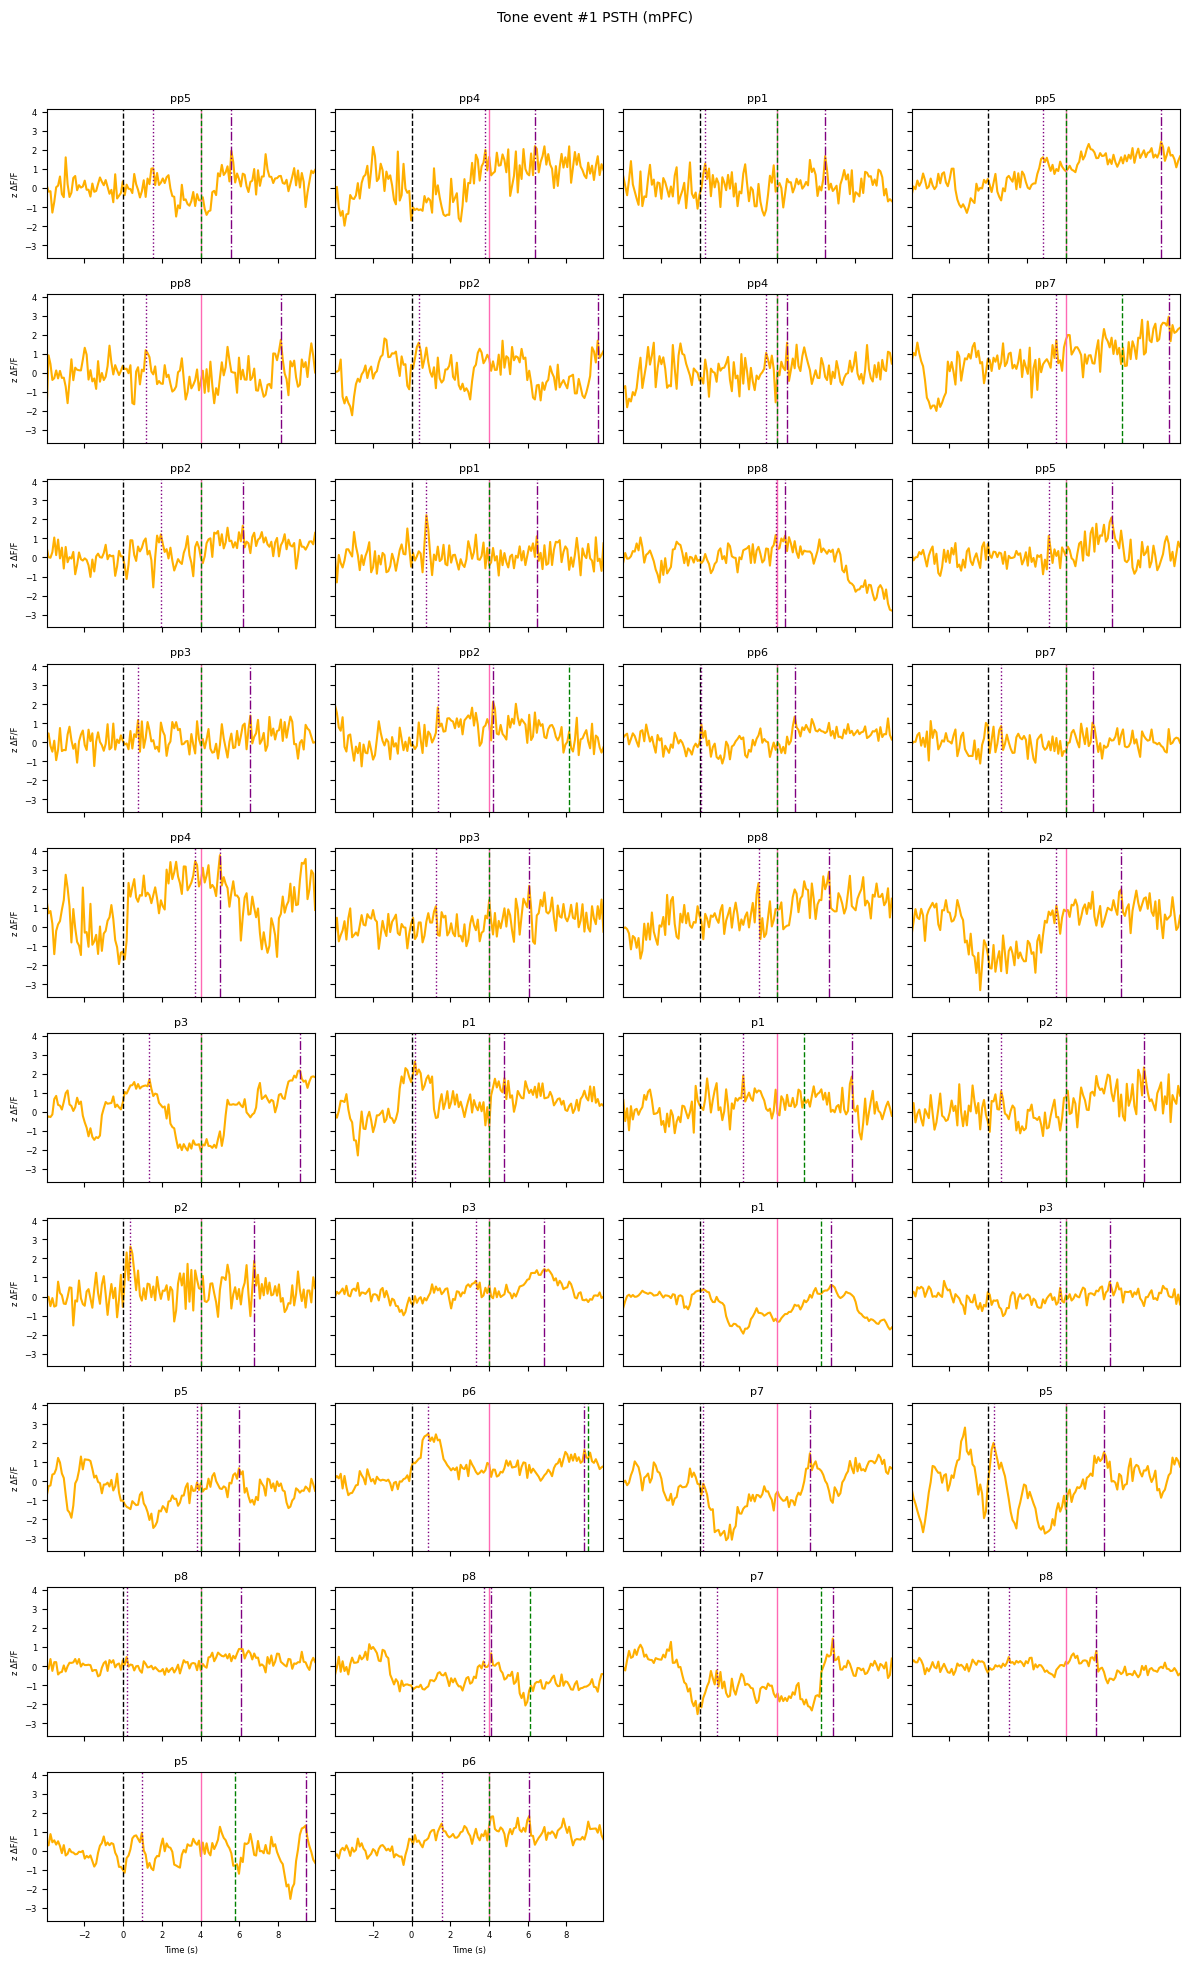

In [16]:
raw_peak_df = exp.plot_tone_and_lick_peaks_with_first_lick(
    df_winning, event_index=1, brain_region='mPFC', use_ei=True
)

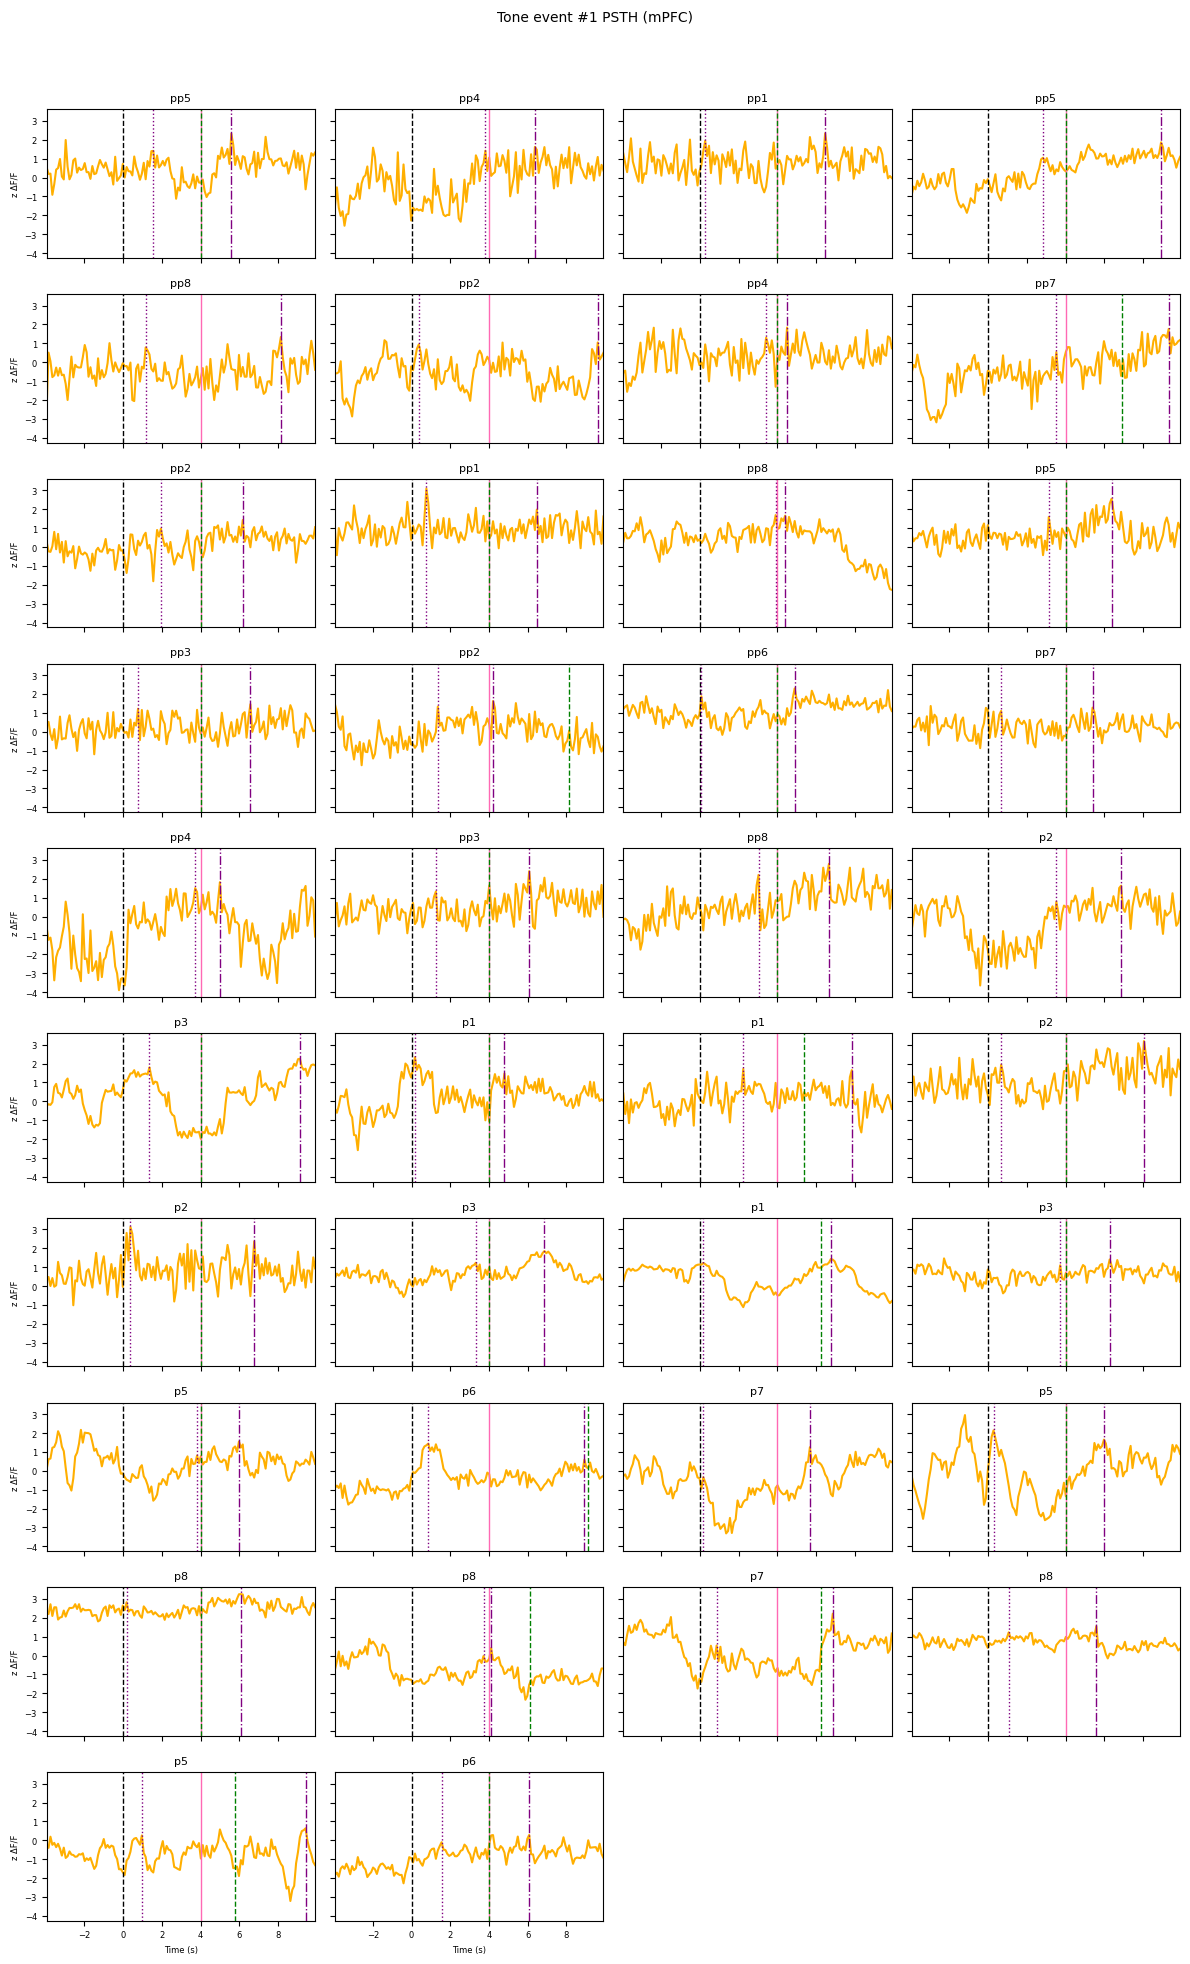

In [17]:
raw_peak_df = exp.plot_tone_and_lick_peaks_with_first_lick(
    df_winning, event_index=1, brain_region='mPFC', use_ei=False
)

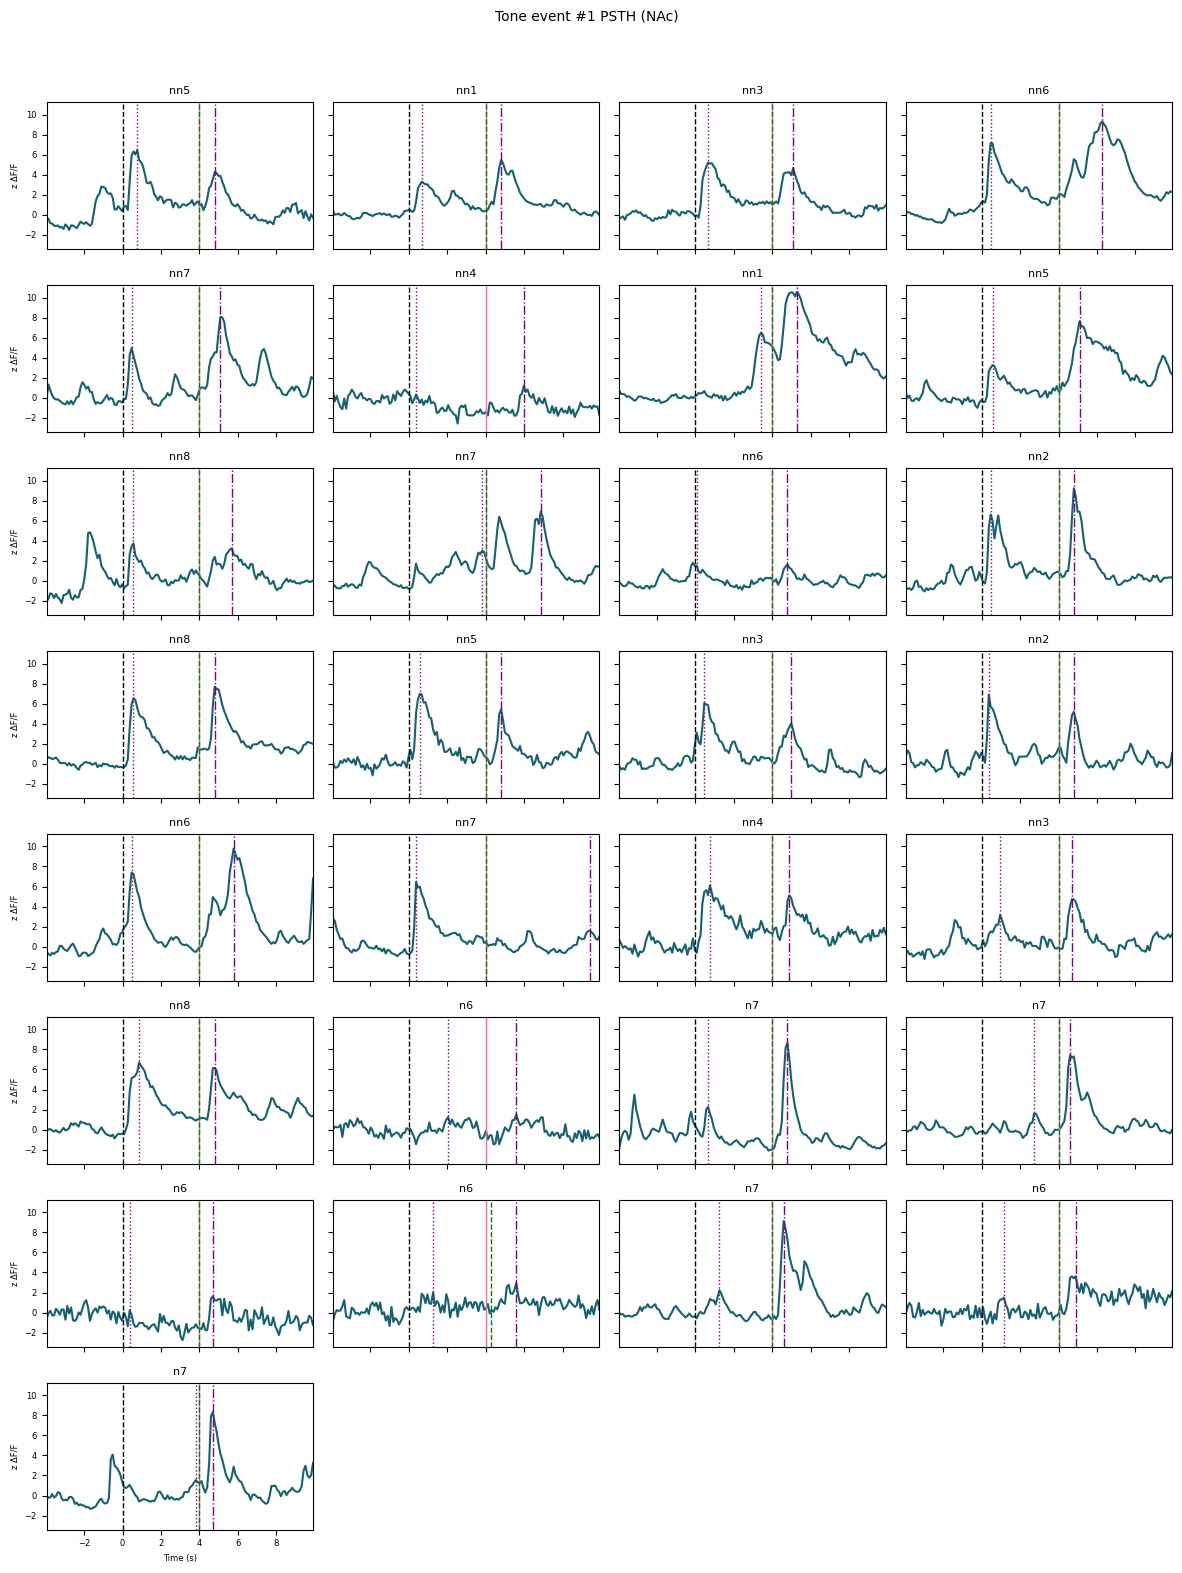

In [18]:
raw_peak_df = exp.plot_tone_and_lick_peaks_with_first_lick(
    df_winning, event_index=1, brain_region='NAc', use_ei=True
)

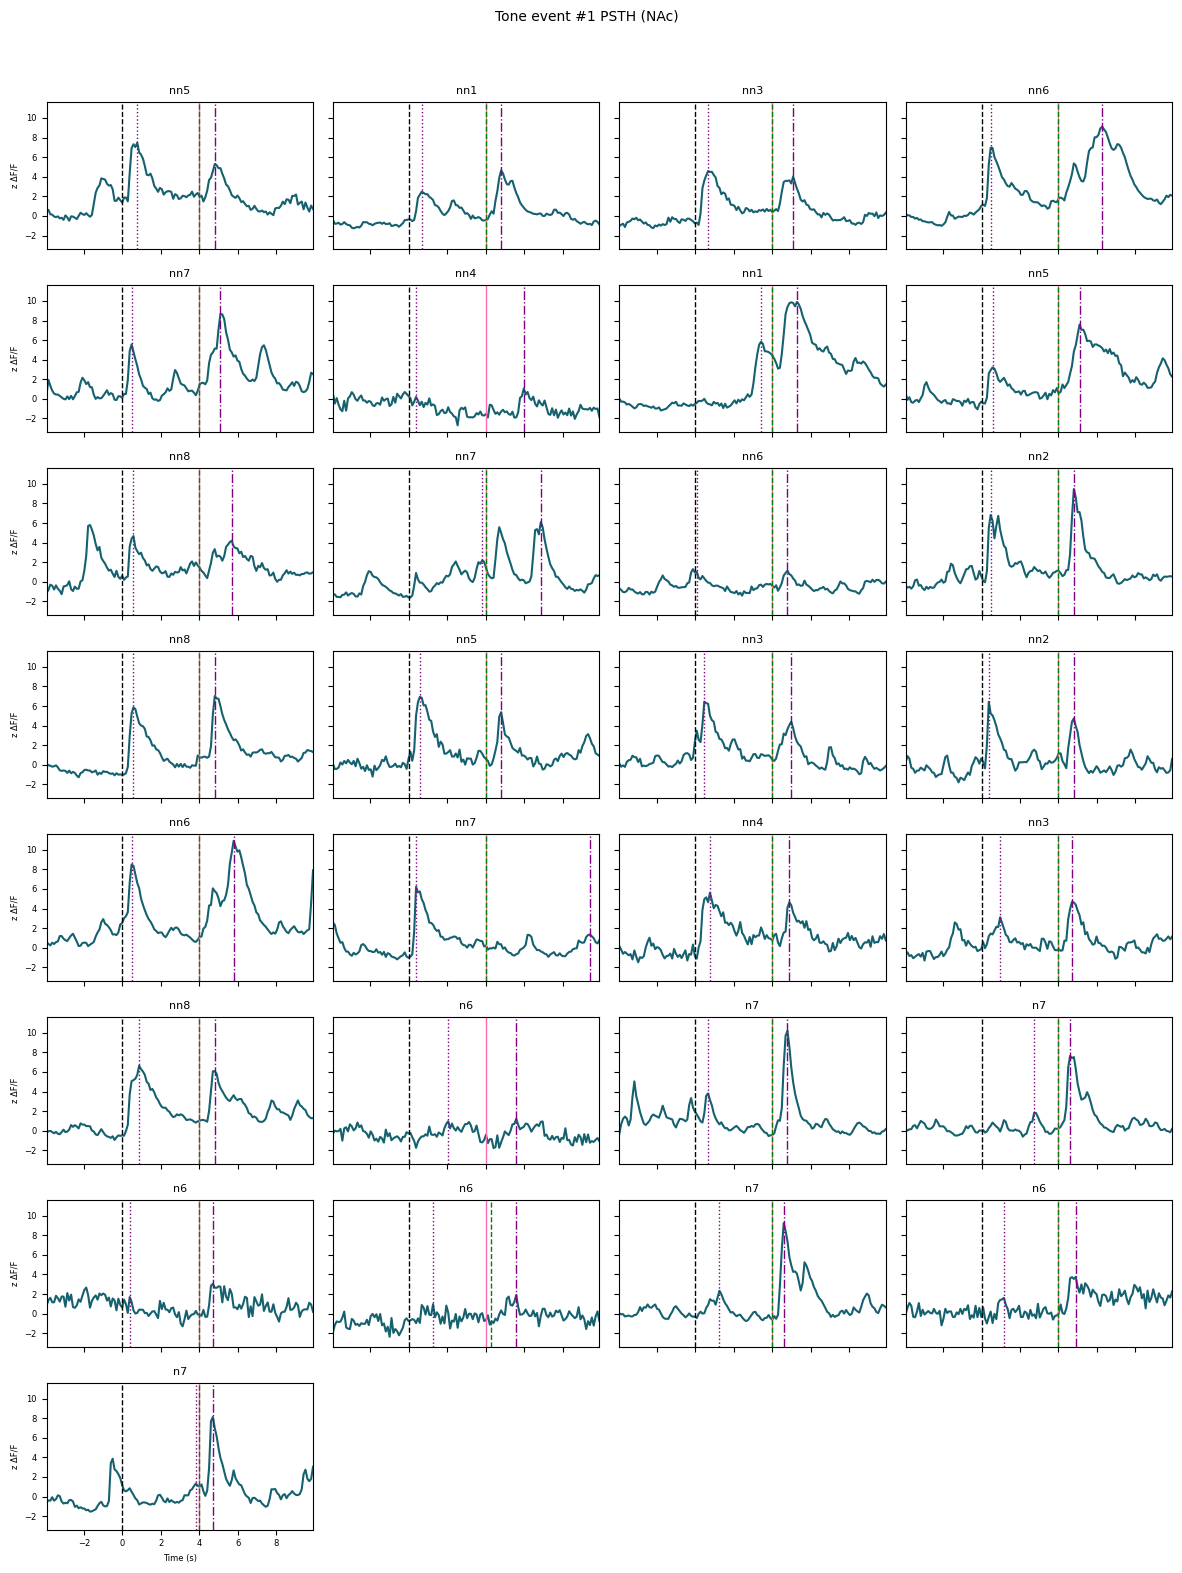

In [19]:
peak_nac_df = exp.plot_tone_and_lick_peaks_with_first_lick(
    df_winning, event_index=1, brain_region='NAc', use_ei=False
)

In [20]:
peak_nac_df.head()
# Save without the index column:

video_name subject_name  event_index brain_region  tone_abs_time_s  \
0  nn5-250203-080636          nn5            1          NAc      1121.133527   
1  nn1-250203-085508          nn1            1          NAc       330.008658   
2  nn3-250203-085508          nn3            1          NAc       250.008207   
3  nn6-250203-112333          nn6            1          NAc       320.798228   
4  nn7-250203-112333          nn7            1          NAc      1595.806679   

   tone_peak_time_s  tone_peak_amp  lick_peak_time_s  lick_peak_amp  \
0          0.768223       7.473127          4.798687       5.292893   
1          0.669771       2.483578          4.798539       4.637266   
2          0.669445       4.577253          5.093125       4.038641   
3          0.472508       6.962549          6.272444       9.125227   
4          0.472810       5.563142          5.093098       8.669035   

   first_lick_time_s  
0                4.0  
1                4.0  
2                4.0  
3                4.0  
4                4.0

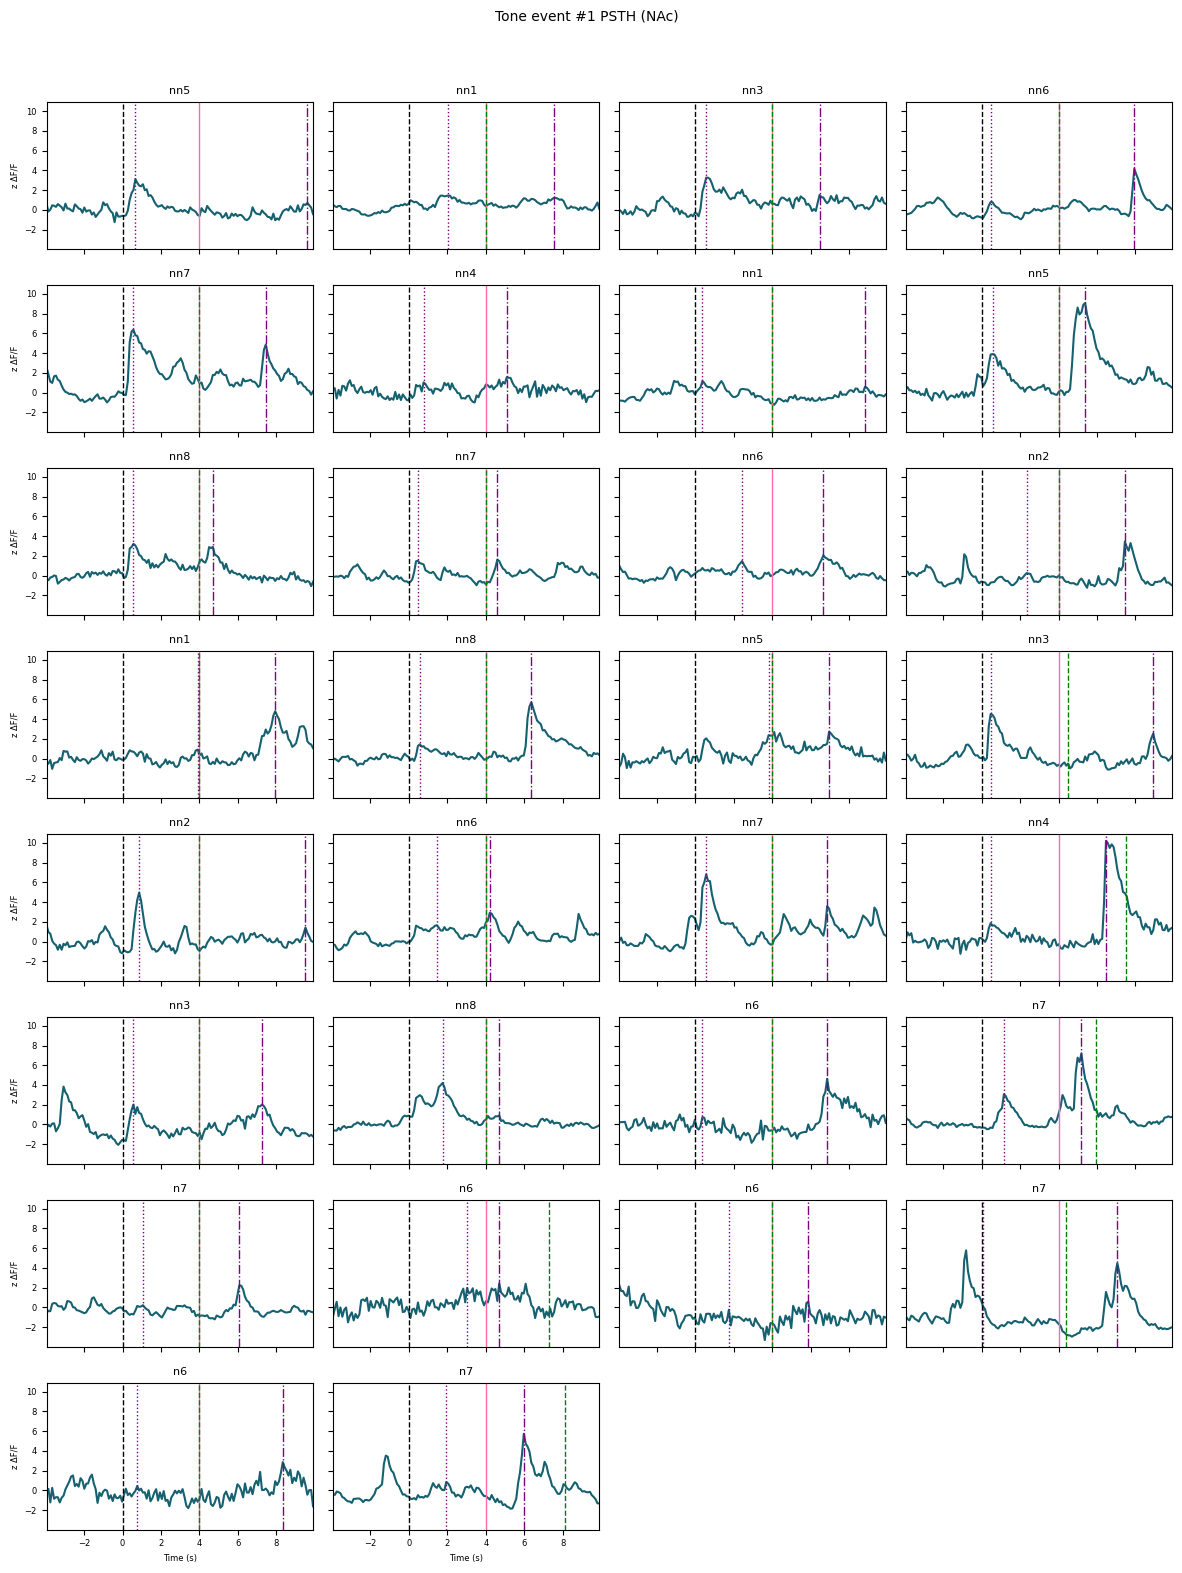

In [21]:
peak_losing_nac_df = exp.plot_tone_and_lick_peaks_with_first_lick(df_losing, event_index=1, brain_region='NAc')

In [22]:
# peak_df = exp.plot_event_index_grid(df_winning, 'Tone', 1, 'mPFC')

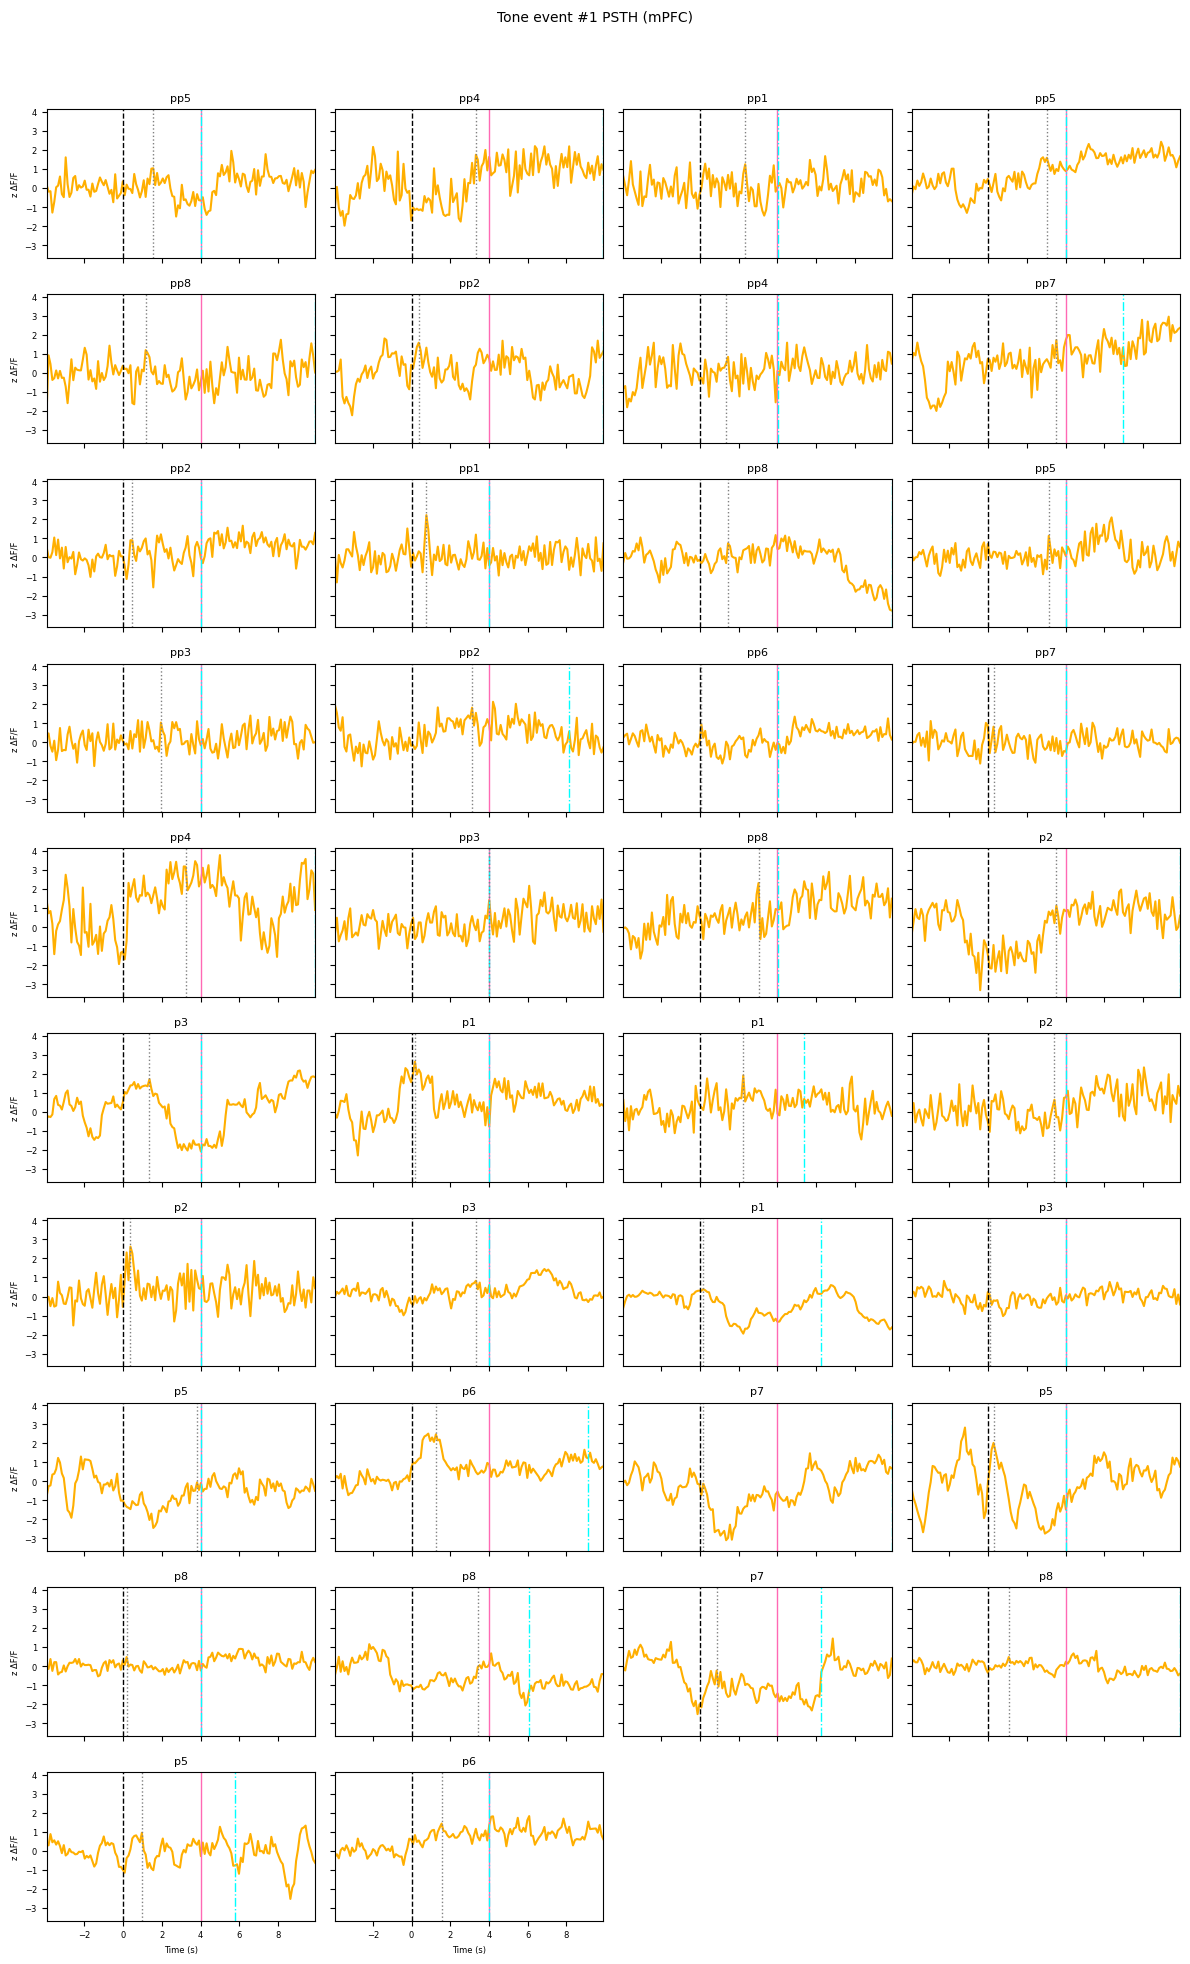

In [23]:
peak_df = exp.plot_event_index_grid(df_winning, 'Tone', 1, 'mPFC')

# Looking at Peak Variance

In [24]:
# Plots PSTHs for all bouts within a session based on winning or losing
"""exp.apply_rc_plot_peth(df_winning, directory_path=directory_path10)
exp.apply_rc_plot_peth(df_losing, directory_path=directory_path11)"""

'exp.apply_rc_plot_peth(df_winning, directory_path=directory_path10)\nexp.apply_rc_plot_peth(df_losing, directory_path=directory_path11)'

In [25]:
# Plots the PETH of the first and last bouts of either win or loss.
"""exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)"""

"exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)\nexp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='

## Mean PSTH graphs

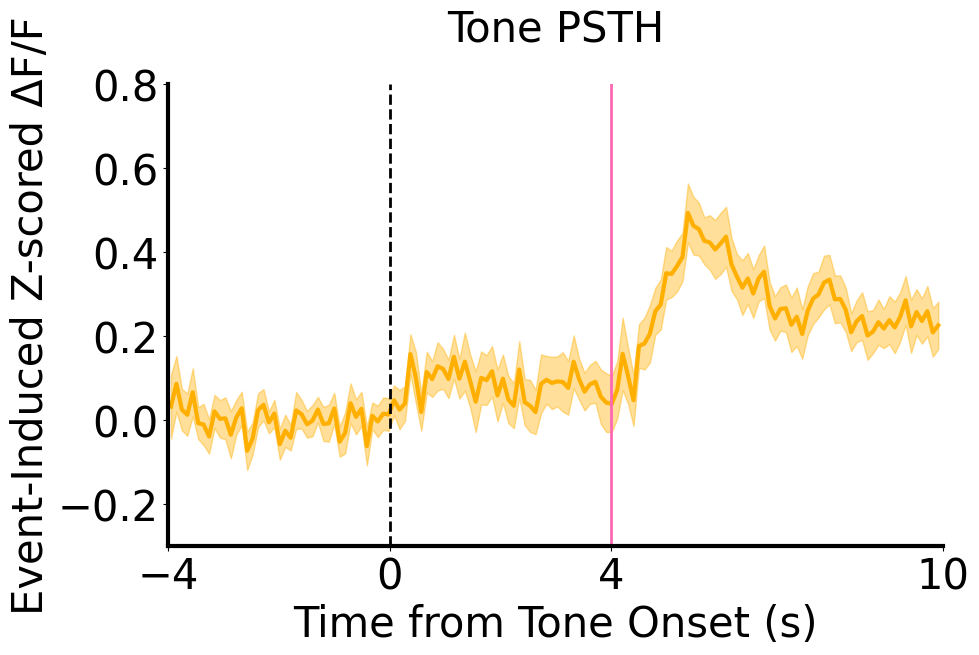

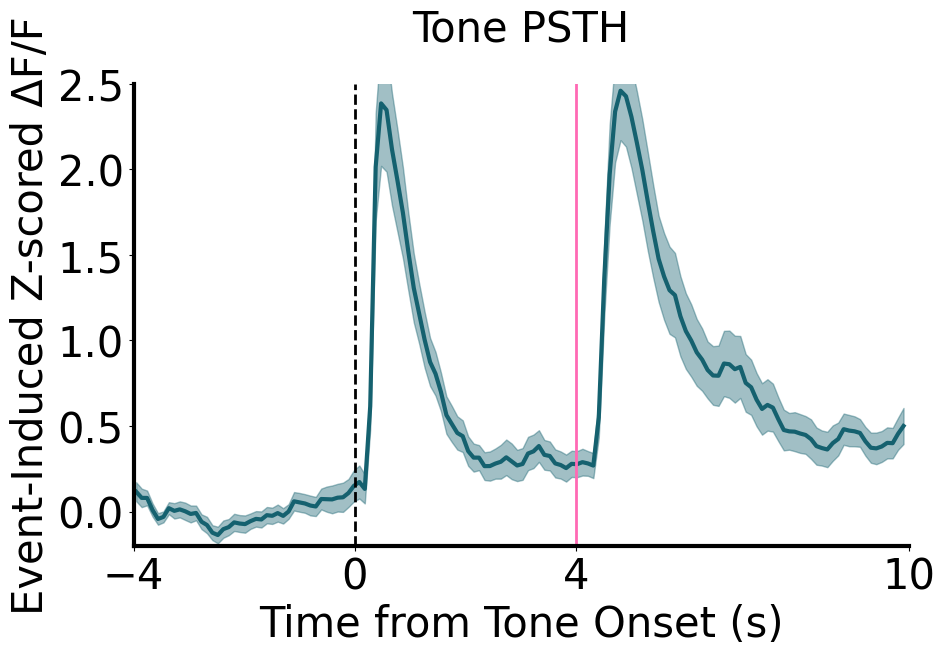

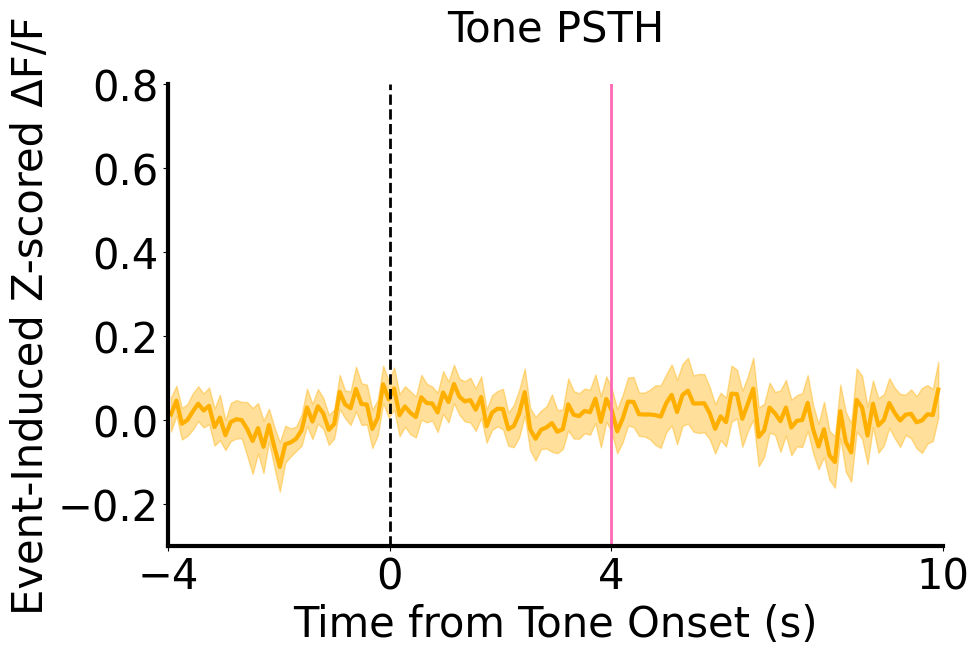

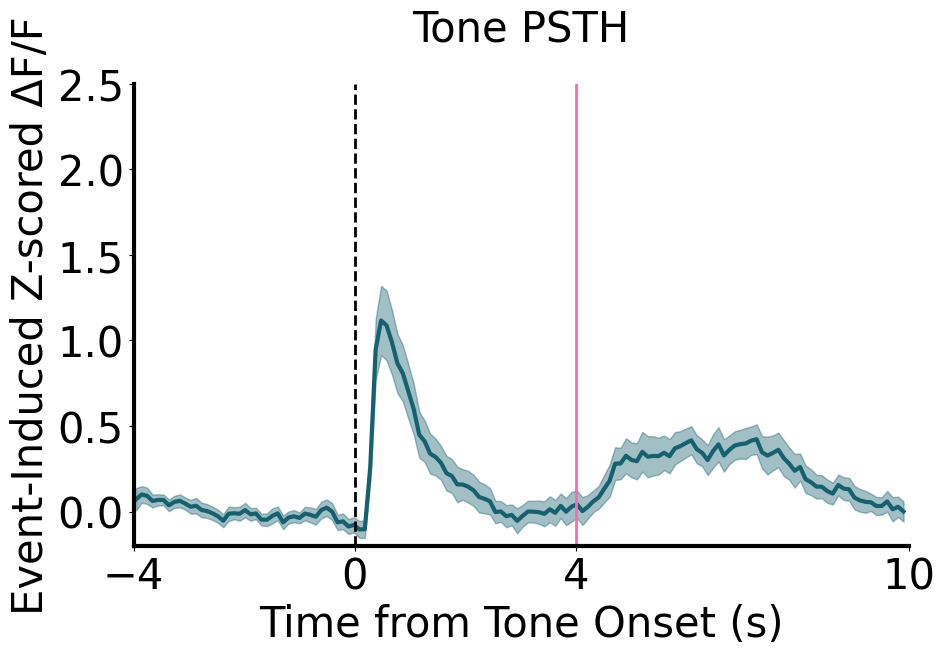

In [26]:
# Plots the mean psth for winning or losing bouts for tones
exp.plot_mean_psth(df_winning, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=0.8)
exp.plot_mean_psth(df_winning, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.5)
exp.plot_mean_psth(df_losing, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=0.8)
exp.plot_mean_psth(df_losing, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.5)

## PSTH of Losing Trials

In [27]:
# Plots the PSTH of either the first or last bout of loss

# Plots the PSTH of the first losing bout
"""exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=True, plot_win=False)
exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=True, plot_win=False)"""

# Plots the PSTH of the last losing bout
"""exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False, plot_win=False)
exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False, plot_win=False)"""

"exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False, plot_win=False)\nexp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False, plot_win=False)"

## PSTH of winning trials

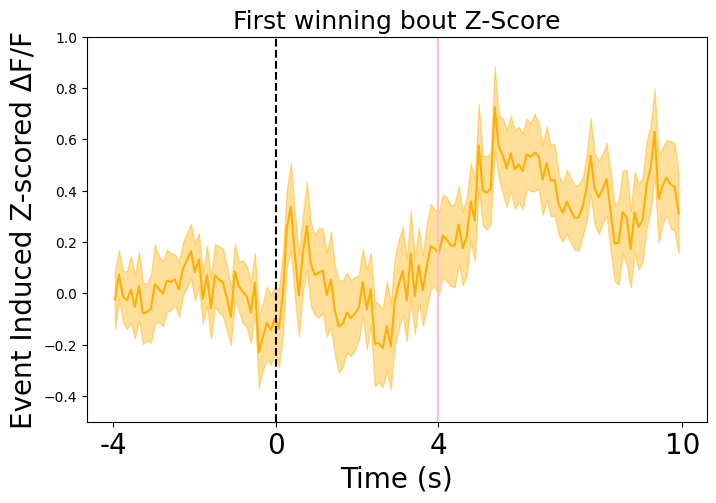

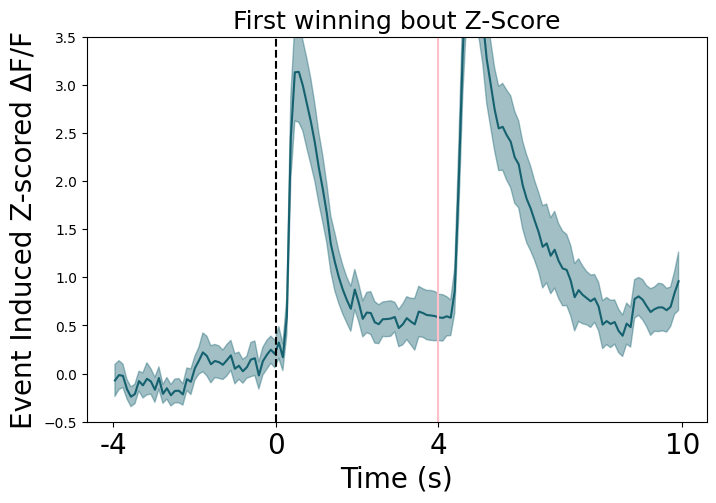

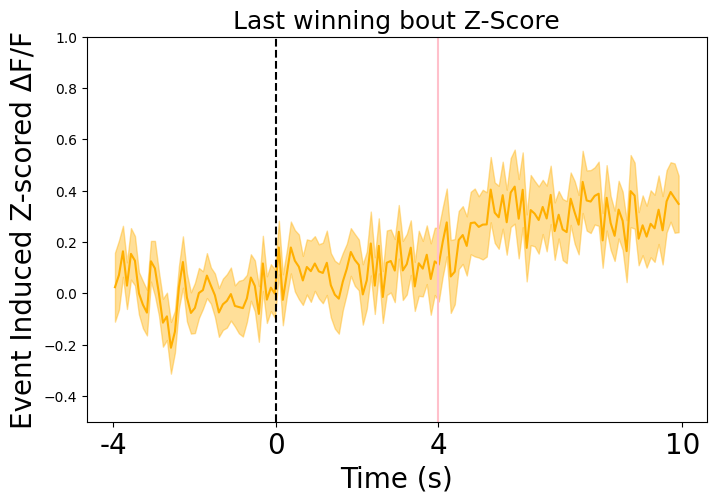

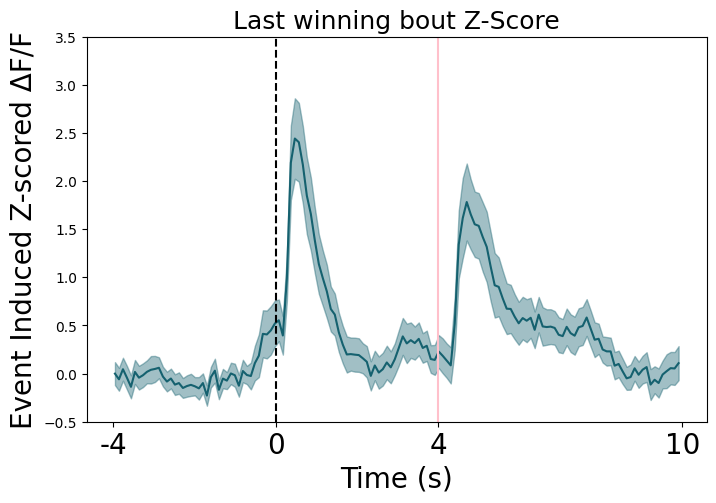

In [28]:
# Plots the PSTH of either the first or last bout of win

# Plots the PSTH of the first winning bout
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=True)
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=True)
# Plots the PSTH of the last winning bout
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False)
exp.plot_single_psth(df_winning, condition='winning', event_type='Tone', directory_path=None, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False)

## Heat Maps Tones

In [29]:
# Plots tone response for first and last wins and loses as heatmaps instead of PSTHs
"""exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'mPFC')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'mPFC')
exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'NAc')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'NAc')"""

"exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'mPFC')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'mPFC')\nexp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'NAc')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'NAc')"

## Heat Maps Licks

In [30]:
# Plots lick response for first and last wins and loses as heatmaps instead of PSTHs
"""exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'mPFC')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'mPFC')
exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'NAc')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'NAc')"""

"exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'mPFC')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'mPFC')\nexp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'NAc')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'NAc')"

## First Tone PSTHs

[DEBUG] PSTH: Plotting Tone event index 1 (0-indexed 0) for brain region NAc
[DEBUG] Row 0, subject nn5: trace shape (14242,), first 5 values: [-0.77837663 -0.77840192 -0.78045308 -0.78221951 -0.78370675]
[DEBUG] Row 2, subject nn1: trace shape (14242,), first 5 values: [0.52349396 0.52374542 0.52528544 0.52680415 0.5283105 ]
[DEBUG] Row 3, subject nn3: trace shape (14242,), first 5 values: [-0.1139676  -0.11784131 -0.12580961 -0.13403303 -0.14247152]
[DEBUG] Row 4, subject nn6: trace shape (14242,), first 5 values: [0.51764954 0.51746434 0.51715902 0.51675111 0.5162432 ]
[DEBUG] Row 5, subject nn7: trace shape (14242,), first 5 values: [-0.13060027 -0.13098761 -0.13179303 -0.13271516 -0.13376429]
[DEBUG] Row 6, subject nn4: trace shape (14242,), first 5 values: [0.45247864 0.46447199 0.4790027  0.49359065 0.5082064 ]
[DEBUG] Row 8, subject nn1: trace shape (14242,), first 5 values: [0.71368945 0.71596382 0.72023409 0.72432786 0.72824824]
[DEBUG] Row 12, subject nn5: trace shape (14242

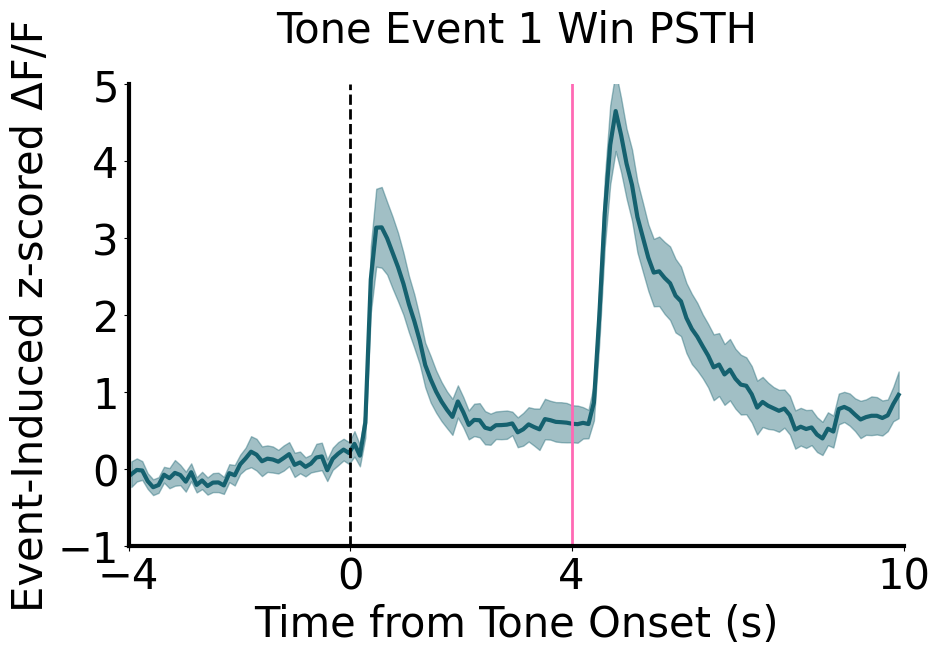

[DEBUG] PSTH: Plotting Tone event index 1 (0-indexed 0) for brain region NAc
[DEBUG] Row 0, subject nn5: trace shape (14242,), first 5 values: [0.69541714 0.70003388 0.70547417 0.71073819 0.71583904]
[DEBUG] Row 2, subject nn1: trace shape (14242,), first 5 values: [0.66666297 0.6663219  0.66557418 0.66471025 0.66373151]
[DEBUG] Row 3, subject nn3: trace shape (14242,), first 5 values: [0.02877549 0.02873933 0.02852084 0.02832516 0.02815917]
[DEBUG] Row 4, subject nn6: trace shape (14242,), first 5 values: [-0.33947887 -0.33971743 -0.34120564 -0.34273522 -0.34429352]
[DEBUG] Row 5, subject nn7: trace shape (14242,), first 5 values: [2.76015952 2.75910138 2.75254186 2.74604573 2.73961469]
[DEBUG] Row 6, subject nn4: trace shape (14242,), first 5 values: [0.54133498 0.53928031 0.53508051 0.53074943 0.52629695]
[DEBUG] Row 8, subject nn1: trace shape (14242,), first 5 values: [-0.68520194 -0.68565458 -0.68704577 -0.68847592 -0.68995329]
[DEBUG] Row 12, subject nn5: trace shape (14242,), f

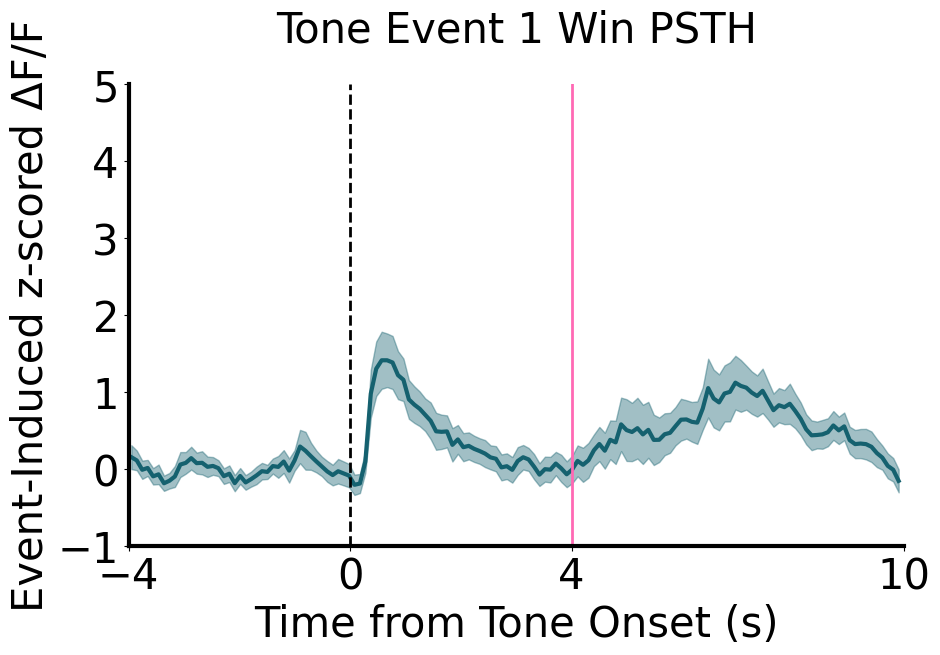

In [31]:
# Winning First tone response
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=None, brain_region='NAc', y_min=-1, y_max=5, df=df_winning, bin_size=100)

# Losing First Tone Response
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=None, brain_region='NAc', y_min=-1, y_max=5, df=df_losing, bin_size=100)

## Finding Means

In [32]:
print(df_winning.columns)
exp.drop_unnecessary(df_winning)
exp.drop_unnecessary(df_losing)
df_win1 = exp.find_overall_mean(df_winning)
df_lose1 = exp.find_overall_mean(df_losing)

Index(['file name', 'subject', 'trial', 'sound cues', 'port entries',
       'sound cues onset', 'port entries onset', 'port entries offset',
       'subject_name', 'winner_array', 'first_value', 'first_tone',
       'first_bout', 'filtered_winner_array', 'filtered_sound_cues',
       'filtered_port_entries', 'filtered_port_entry_offset',
       'first_lick_after_sound_cue', 'closest_lick_offset', 'DS', 'Cage',
       'Rank', 'Tone Event_Time_Axis', 'Tone Event_Zscore',
       'Lick Event_Time_Axis', 'Lick Event_Zscore', 'Mean Tone Event_Zscore',
       'Mean Lick Event_Zscore', 'Tone AUC', 'Tone Max Peak',
       'Tone Time of Max Peak', 'Tone Mean Z-score', 'Tone Adjusted End',
       'Lick AUC', 'Lick Max Peak', 'Lick Time of Max Peak',
       'Lick Mean Z-score', 'Lick Adjusted End', 'Tone Mean Z-score EI',
       'Tone AUC EI', 'Tone Max Peak EI', 'Tone Time of Max Peak EI',
       'Lick Mean Z-score EI', 'Lick AUC EI', 'Lick Max Peak EI',
       'Lick Time of Max Peak EI', 'Lick 

In [33]:
print(df_win1)

   subject_name  Rank Cage                               Tone Event_Time_Axis  \
0            n6     2   n2  [[-4.0, -3.9990169600200716, -3.99803392004014...   
1            n7     3   n2  [[-4.0, -3.9990169600200716, -3.99803392004014...   
2           nn1     4  nn1  [[-4.0, -3.9990169600200716, -3.99803392004014...   
3           nn2     2  nn1  [[-4.0, -3.9990169600200716, -3.99803392004014...   
4           nn3     3  nn1  [[-4.0, -3.9990169600200716, -3.99803392004014...   
5           nn4     1  nn1  [[-4.0, -3.9990169600200716, -3.99803392004014...   
6           nn5     4  nn2  [[-4.0, -3.9990169600200716, -3.99803392004014...   
7           nn6     2  nn2  [[-4.0, -3.9990169600200716, -3.99803392004014...   
8           nn7     3  nn2  [[-4.0, -3.9990169600200716, -3.99803392004014...   
9           nn8     1  nn2  [[-4.0, -3.9990169600200716, -3.99803392004014...   
10           p1     3   p1  [[-4.0, -3.9990169600200716, -3.99803392004014...   
11           p2     1   p1  

## Heat maps of winning and losing for all subjects

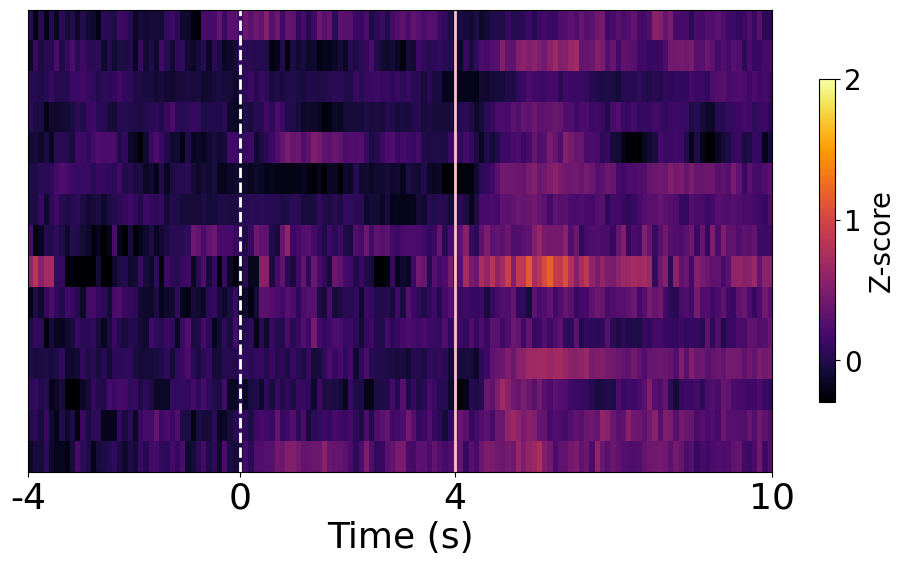

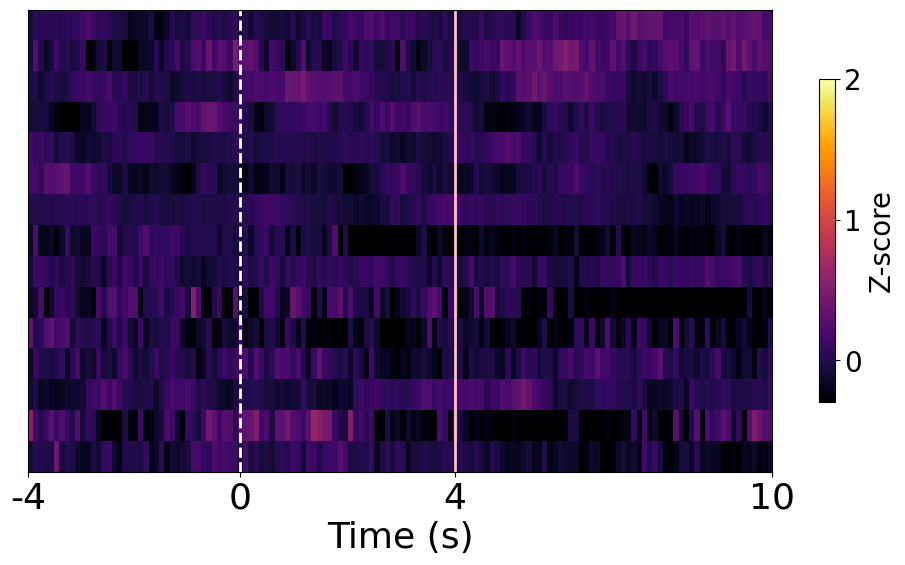

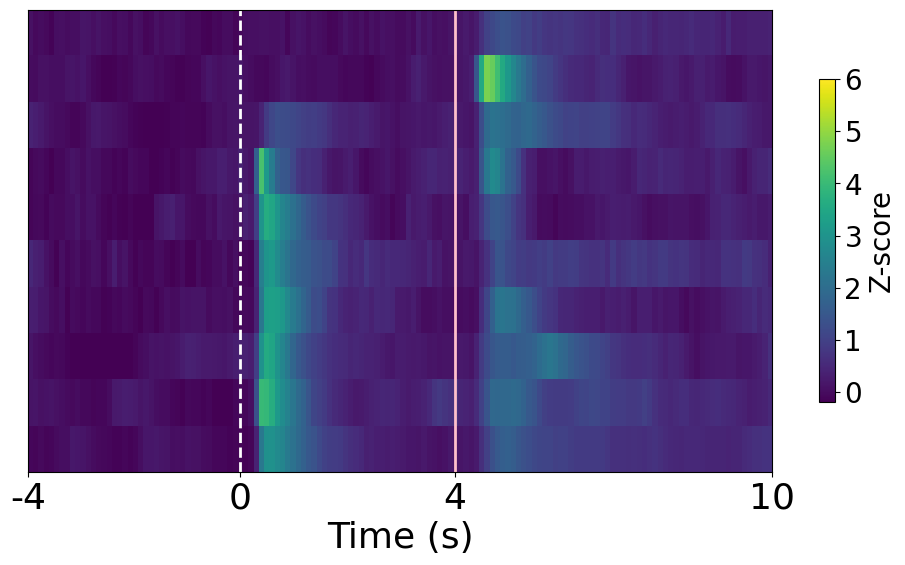

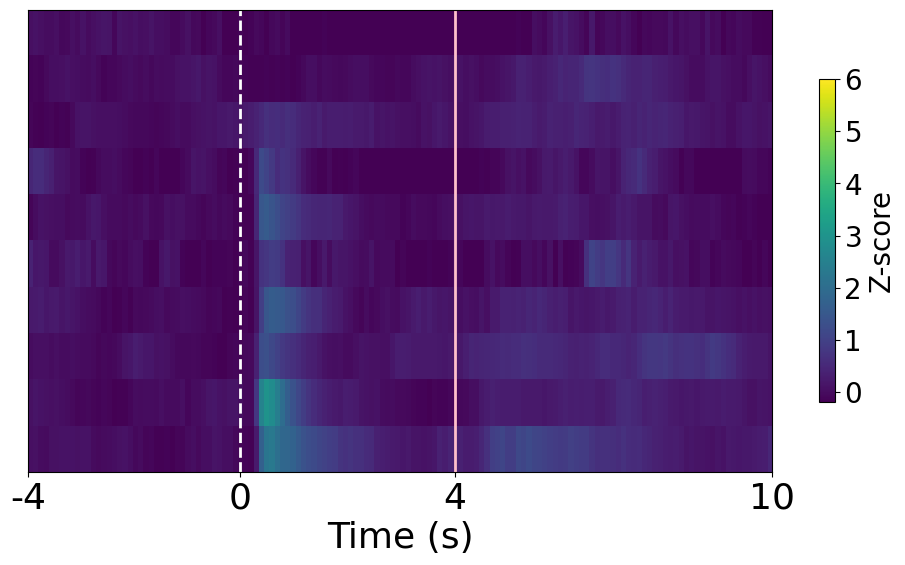

In [34]:
# Each row represents a separate subject

exp.plot_mean_per_row_heatmaps(df_win1, 'win', 'Tone', directory_path8, 'mPFC')
exp.plot_mean_per_row_heatmaps(df_lose1, 'lose', 'Tone', directory_path8, 'mPFC')
exp.plot_mean_per_row_heatmaps(df_win1, 'win', 'Tone', directory_path8, 'NAc')
exp.plot_mean_per_row_heatmaps(df_lose1, 'lose', 'Tone', directory_path8, 'NAc')

In [35]:
exp = Reward_Competition(experiment_folder_path=experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240912-062009\Notes.txt
read from t=0s to t=2073.36s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240913-062437\Notes.txt
read from t=0s to t=2044.96s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240914-065650\Notes.txt
read from t=0s to t=2047.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240914-095611\Notes.txt
read from t=0s to t=2053.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n7-240912-095235\Notes.txt
read from t=0s to t=1955.86s
Found Synapse note file: C:\Users\alber\

   Lick AUC EI
0     2.274554
1     1.511753
2     5.484946
3     2.440168
4     0.029209
5     2.909784
6     0.844740
7     2.653352
8     3.461458
9     3.028308
   Lick AUC EI
0    -0.770028
1     1.367374
2     1.694376
3     0.183775
4     0.043525
5     1.007611
6     1.007618
7     2.019221
8     1.141851
9     1.521598
Index(['Lick AUC EI'], dtype='object')
Processing column: Lick AUC EI
df: 0    2.274554
1    1.511753
2    5.484946
3    2.440168
4    0.029209
5    2.909784
6    0.844740
7    2.653352
8    3.461458
9    3.028308
Name: Lick AUC EI, dtype: float64
df1: 0   -0.770028
1    1.367374
2    1.694376
3    0.183775
4    0.043525
5    1.007611
6    1.007618
7    2.019221
8    1.141851
9    1.521598
Name: Lick AUC EI, dtype: float64
T-test for Lick AUC EI and Lick AUC EI: t=2.828, p=1.319e-02


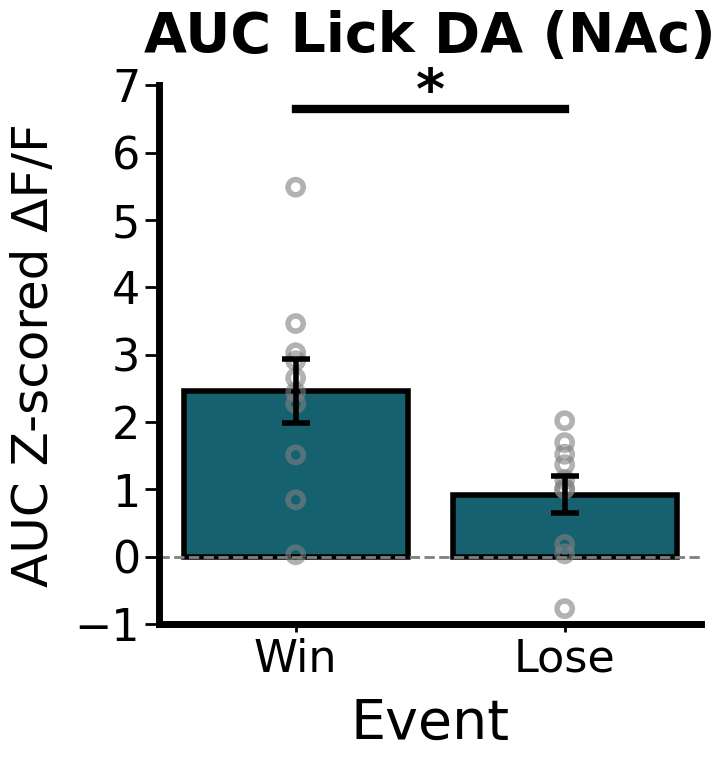

    Lick AUC EI
10     0.822598
11     1.238544
12     0.541748
13     0.389076
14     1.665559
15     1.473251
16     0.903667
17     1.069365
18     2.099883
19     1.113501
20     0.405111
21     1.692344
22     0.652646
23     1.420675
24     0.873451
    Lick AUC EI
10     0.772222
11     0.903895
12     0.637969
13     0.596524
14    -0.110183
15     0.203810
16    -0.303042
17    -1.014588
18     0.271236
19    -2.391873
20    -0.394483
21     0.209637
22    -0.872849
23     1.079547
24    -0.489694
Index(['Lick AUC EI'], dtype='object')
Processing column: Lick AUC EI
df: 10    0.822598
11    1.238544
12    0.541748
13    0.389076
14    1.665559
15    1.473251
16    0.903667
17    1.069365
18    2.099883
19    1.113501
20    0.405111
21    1.692344
22    0.652646
23    1.420675
24    0.873451
Name: Lick AUC EI, dtype: float64
df1: 10    0.772222
11    0.903895
12    0.637969
13    0.596524
14   -0.110183
15    0.203810
16   -0.303042
17   -1.014588
18    0.271236
19   -2.391873


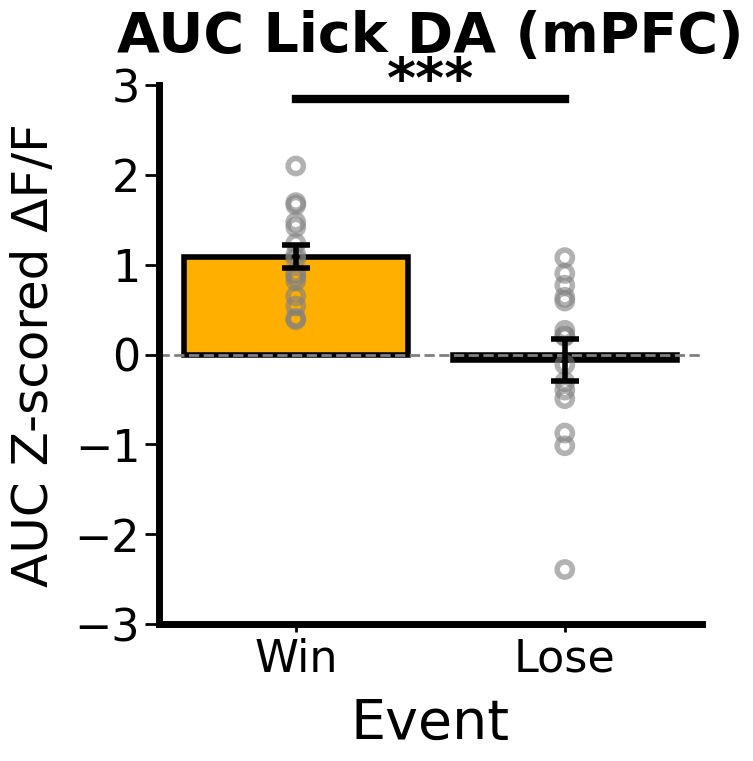

   Tone AUC EI
0     0.218515
1    -0.001563
2     2.392522
3     2.800924
4     4.061324
5     3.720143
6     4.306227
7     4.676153
8     4.569442
9     3.730133
   Tone AUC EI
0    -1.332873
1    -0.025990
2     1.706946
3     0.199794
4     1.115717
5     0.314645
6     1.587460
7     1.300114
8     1.789541
9     3.897271
Index(['Tone AUC EI'], dtype='object')
Processing column: Tone AUC EI
df: 0    0.218515
1   -0.001563
2    2.392522
3    2.800924
4    4.061324
5    3.720143
6    4.306227
7    4.676153
8    4.569442
9    3.730133
Name: Tone AUC EI, dtype: float64
df1: 0   -1.332873
1   -0.025990
2    1.706946
3    0.199794
4    1.115717
5    0.314645
6    1.587460
7    1.300114
8    1.789541
9    3.897271
Name: Tone AUC EI, dtype: float64
T-test for Tone AUC EI and Tone AUC EI: t=2.855, p=1.082e-02


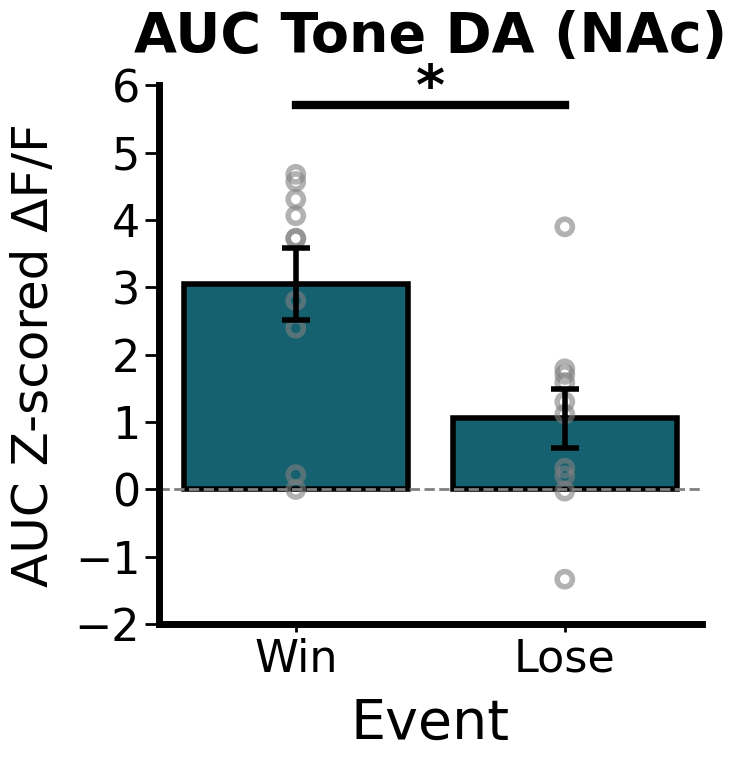

    Tone AUC EI
10     0.298515
11    -0.190139
12     0.114678
13    -0.106836
14     1.827303
15    -0.597828
16    -0.060144
17     0.656828
18     0.966555
19     0.412009
20     0.405884
21     0.206999
22     0.027054
23     0.556577
24     0.607789
    Tone AUC EI
10     0.203915
11    -0.015887
12     0.346235
13     0.353503
14    -0.036443
15    -0.272124
16     0.041183
17    -0.776777
18     0.173190
19    -0.027798
20    -0.812375
21     0.058972
22     0.602402
23     0.992158
24     0.154470
Index(['Tone AUC EI'], dtype='object')
Processing column: Tone AUC EI
df: 10    0.298515
11   -0.190139
12    0.114678
13   -0.106836
14    1.827303
15   -0.597828
16   -0.060144
17    0.656828
18    0.966555
19    0.412009
20    0.405884
21    0.206999
22    0.027054
23    0.556577
24    0.607789
Name: Tone AUC EI, dtype: float64
df1: 10    0.203915
11   -0.015887
12    0.346235
13    0.353503
14   -0.036443
15   -0.272124
16    0.041183
17   -0.776777
18    0.173190
19   -0.027798


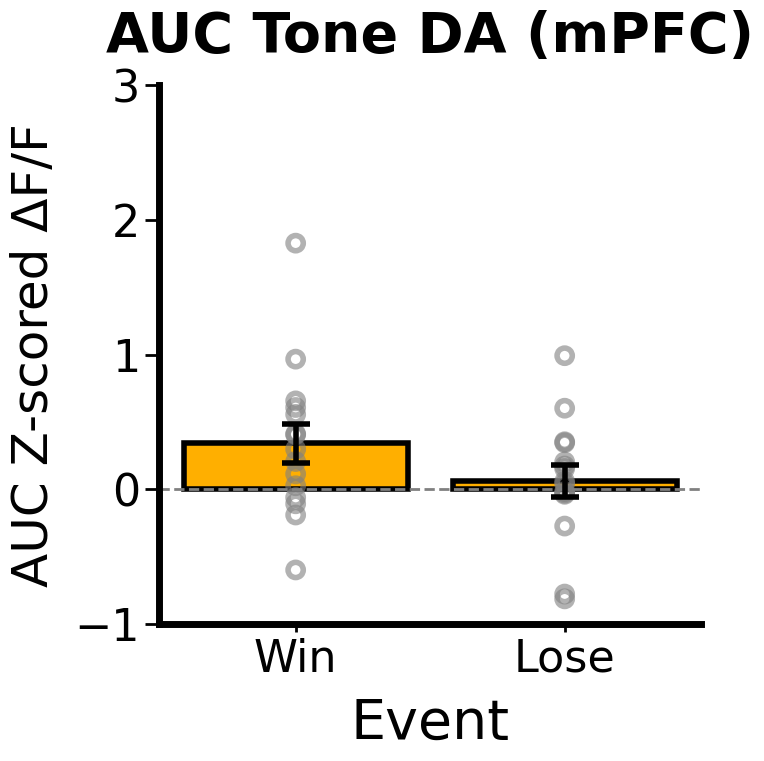

   Lick Max Peak EI
0          1.162734
1          1.449057
2          2.515121
3          1.491070
4          0.622156
5          1.337743
6          0.762285
7          2.534987
8          1.828182
9          1.392576
   Lick Max Peak EI
0          0.602859
1          1.271268
2          1.141050
3          0.939980
4          0.735168
5          1.433462
6          0.892927
7          0.967696
8          0.797479
9          1.199158
Index(['Lick Max Peak EI'], dtype='object')
Processing column: Lick Max Peak EI
df: 0    1.162734
1    1.449057
2    2.515121
3    1.491070
4    0.622156
5    1.337743
6    0.762285
7    2.534987
8    1.828182
9    1.392576
Name: Lick Max Peak EI, dtype: float64
df1: 0    0.602859
1    1.271268
2    1.141050
3    0.939980
4    0.735168
5    1.433462
6    0.892927
7    0.967696
8    0.797479
9    1.199158
Name: Lick Max Peak EI, dtype: float64
T-test for Lick Max Peak EI and Lick Max Peak EI: t=2.345, p=3.726e-02


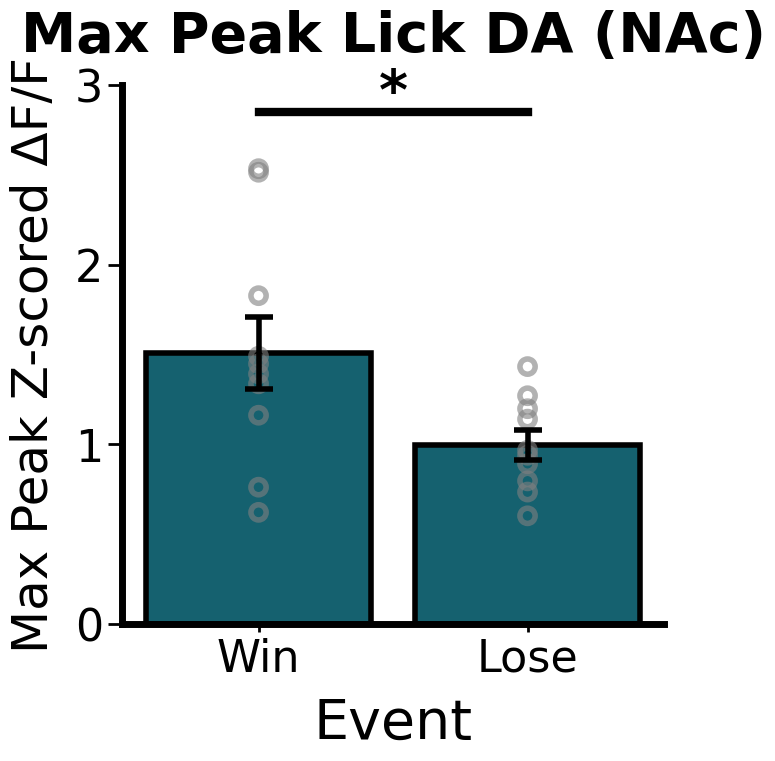

    Lick Max Peak EI
10          0.778746
11          0.922917
12          0.480084
13          0.491702
14          1.244494
15          0.743885
16          0.540929
17          0.922083
18          1.739281
19          0.698318
20          0.709475
21          0.894631
22          0.594092
23          0.868426
24          1.100413
    Lick Max Peak EI
10          0.595436
11          1.002039
12          0.592820
13          0.810428
14          0.270172
15          0.504954
16          0.258109
17          0.236776
18          0.424478
19          0.371518
20          0.695048
21          0.554029
22          0.437522
23          1.596175
24          0.364521
Index(['Lick Max Peak EI'], dtype='object')
Processing column: Lick Max Peak EI
df: 10    0.778746
11    0.922917
12    0.480084
13    0.491702
14    1.244494
15    0.743885
16    0.540929
17    0.922083
18    1.739281
19    0.698318
20    0.709475
21    0.894631
22    0.594092
23    0.868426
24    1.100413
Name: Lick Max Peak

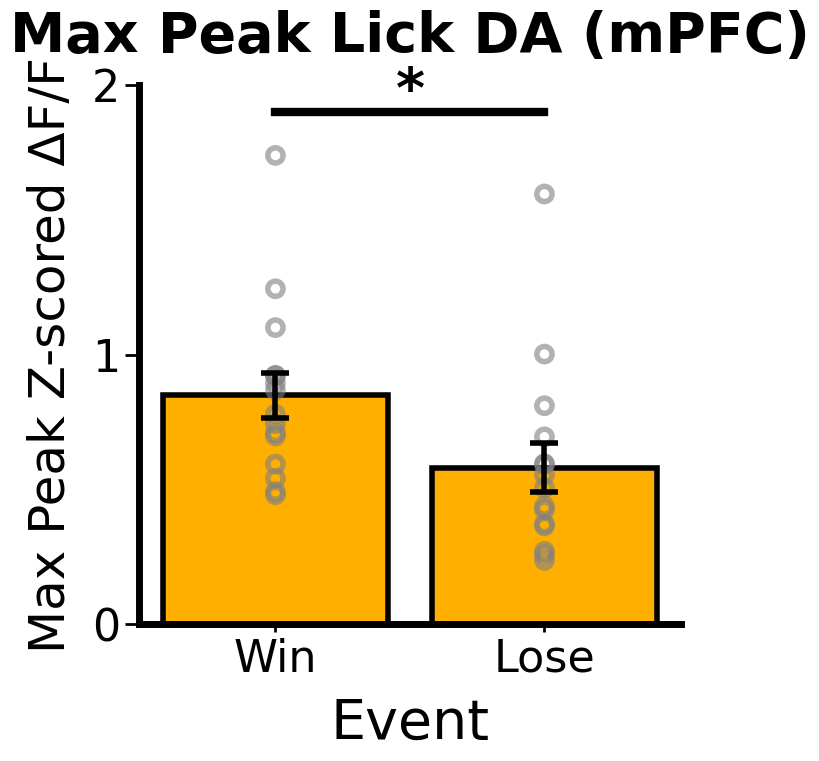

   Tone Max Peak EI
0          0.574077
1          0.679824
2          1.880586
3          3.722146
4          3.942399
5          3.051907
6          3.886438
7          4.417283
8          4.510064
9          3.163807
   Tone Max Peak EI
0          0.449906
1          0.472967
2          1.160743
3          1.705140
4          1.574384
5          1.051152
6          1.782979
7          1.508008
8          2.864603
9          2.563139
Index(['Tone Max Peak EI'], dtype='object')
Processing column: Tone Max Peak EI
df: 0    0.574077
1    0.679824
2    1.880586
3    3.722146
4    3.942399
5    3.051907
6    3.886438
7    4.417283
8    4.510064
9    3.163807
Name: Tone Max Peak EI, dtype: float64
df1: 0    0.449906
1    0.472967
2    1.160743
3    1.705140
4    1.574384
5    1.051152
6    1.782979
7    1.508008
8    2.864603
9    2.563139
Name: Tone Max Peak EI, dtype: float64
T-test for Tone Max Peak EI and Tone Max Peak EI: t=2.809, p=1.402e-02


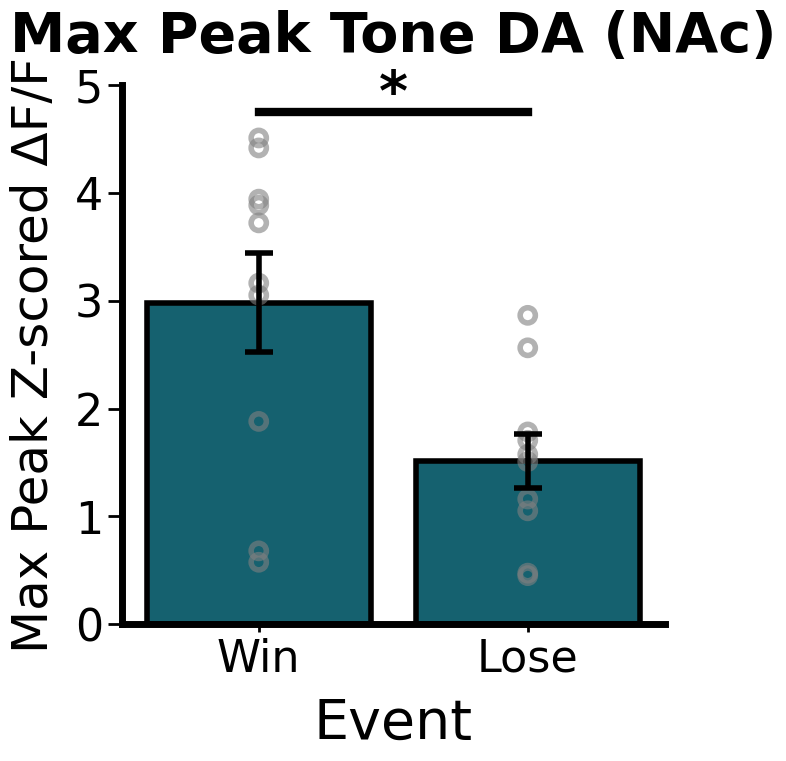

    Tone Max Peak EI
10          0.676231
11          0.497820
12          0.432332
13          0.338296
14          0.983933
15          0.223952
16          0.388548
17          0.803825
18          1.500979
19          0.619252
20          0.712002
21          0.405038
22          0.330045
23          0.514336
24          0.932201
    Tone Max Peak EI
10          0.605397
11          0.575165
12          0.583842
13          0.591285
14          0.279854
15          0.326977
16          0.301790
17          0.465609
18          0.454618
19          0.906253
20          0.476419
21          0.569514
22          0.883044
23          1.402135
24          0.541437
Index(['Tone Max Peak EI'], dtype='object')
Processing column: Tone Max Peak EI
df: 10    0.676231
11    0.497820
12    0.432332
13    0.338296
14    0.983933
15    0.223952
16    0.388548
17    0.803825
18    1.500979
19    0.619252
20    0.712002
21    0.405038
22    0.330045
23    0.514336
24    0.932201
Name: Tone Max Peak

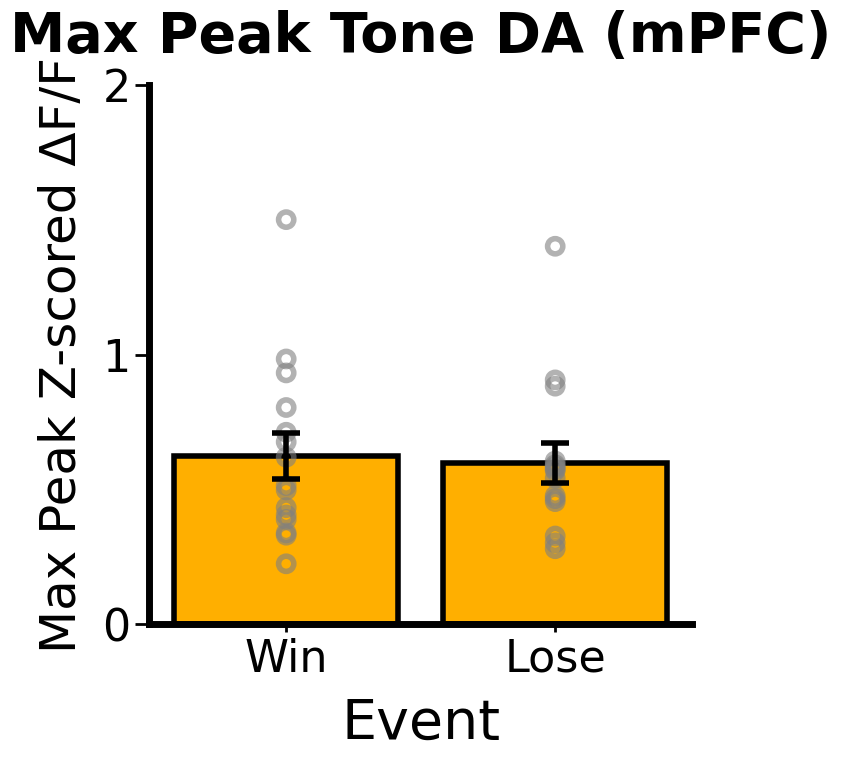

   Lick Mean Z-score EI
0              0.568637
1              0.377976
2              1.371270
3              0.610009
4              0.007331
5              0.727428
6              0.211219
7              0.663618
8              0.865385
9              0.757131
   Lick Mean Z-score EI
0             -0.192470
1              0.341823
2              0.423606
3              0.045964
4              0.010901
5              0.251843
6              0.251908
7              0.504746
8              0.285456
9              0.380434
Index(['Lick Mean Z-score EI'], dtype='object')
Processing column: Lick Mean Z-score EI
df: 0    0.568637
1    0.377976
2    1.371270
3    0.610009
4    0.007331
5    0.727428
6    0.211219
7    0.663618
8    0.865385
9    0.757131
Name: Lick Mean Z-score EI, dtype: float64
df1: 0   -0.192470
1    0.341823
2    0.423606
3    0.045964
4    0.010901
5    0.251843
6    0.251908
7    0.504746
8    0.285456
9    0.380434
Name: Lick Mean Z-score EI, dtype: float64
T-test fo

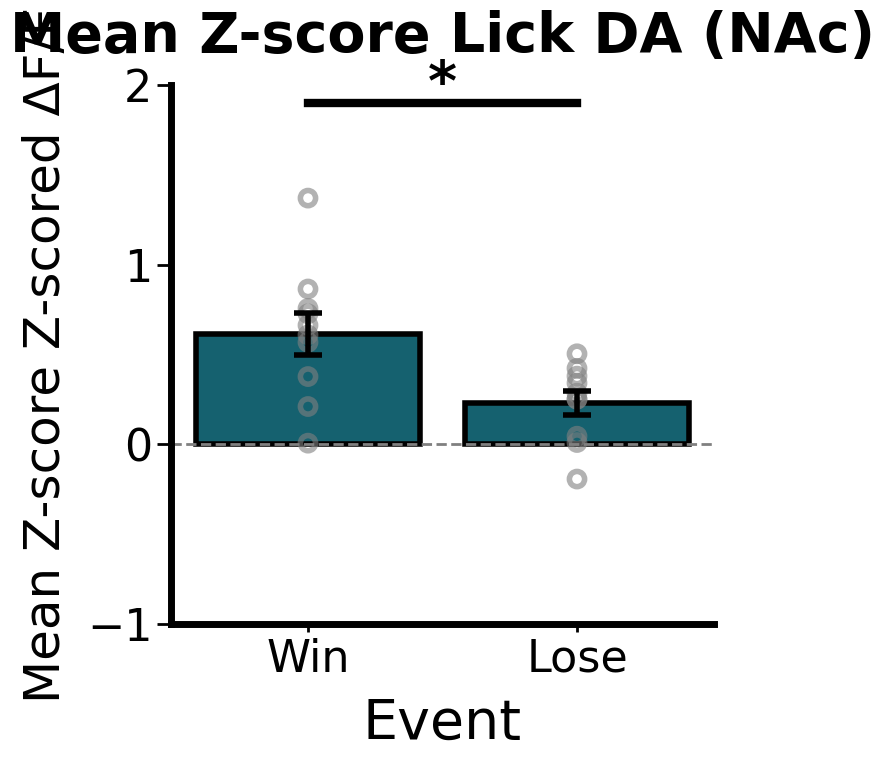

    Lick Mean Z-score EI
10              0.205650
11              0.309669
12              0.135420
13              0.097287
14              0.416430
15              0.368341
16              0.225927
17              0.267364
18              0.524973
19              0.278360
20              0.101289
21              0.423103
22              0.163187
23              0.355147
24              0.218369
    Lick Mean Z-score EI
10              0.193020
11              0.226025
12              0.159515
13              0.149129
14             -0.027550
15              0.050967
16             -0.075745
17             -0.253640
18              0.067776
19             -0.597935
20             -0.098658
21              0.052441
22             -0.218147
23              0.269821
24             -0.122436
Index(['Lick Mean Z-score EI'], dtype='object')
Processing column: Lick Mean Z-score EI
df: 10    0.205650
11    0.309669
12    0.135420
13    0.097287
14    0.416430
15    0.368341
16    0.225927
17 

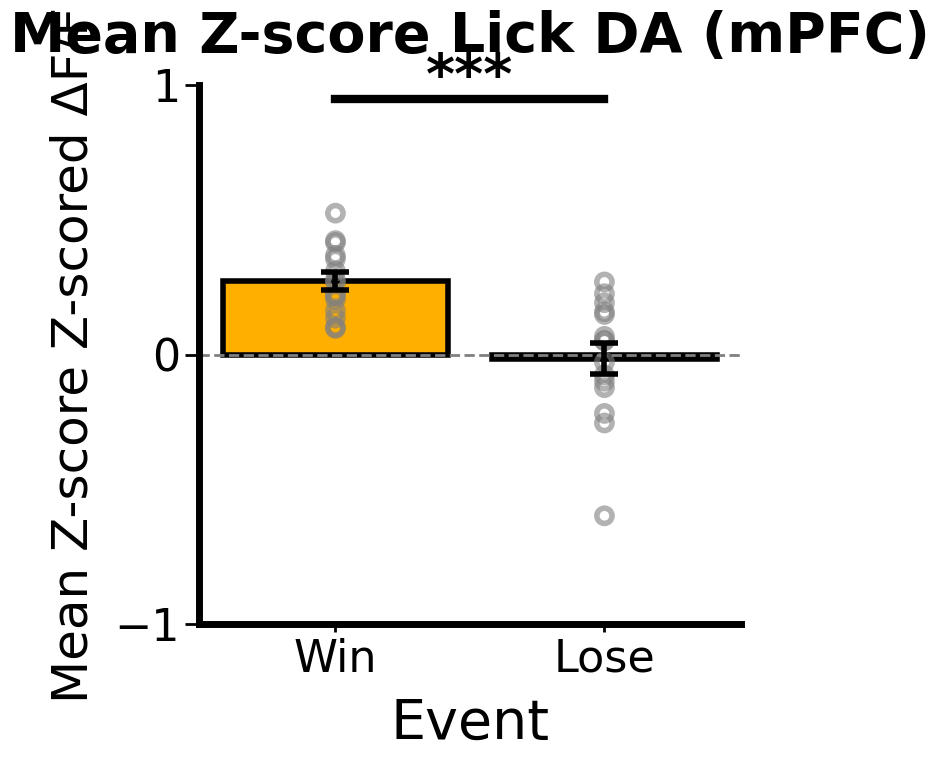

   Tone Mean Z-score EI
0              0.054668
1             -0.000364
2              0.598323
3              0.700328
4              1.015409
5              0.930046
6              1.076548
7              1.169130
8              1.142443
9              0.932559
   Tone Mean Z-score EI
0             -0.333309
1             -0.006499
2              0.426780
3              0.049907
4              0.278931
5              0.078657
6              0.396866
7              0.325039
8              0.447368
9              0.974390
Index(['Tone Mean Z-score EI'], dtype='object')
Processing column: Tone Mean Z-score EI
df: 0    0.054668
1   -0.000364
2    0.598323
3    0.700328
4    1.015409
5    0.930046
6    1.076548
7    1.169130
8    1.142443
9    0.932559
Name: Tone Mean Z-score EI, dtype: float64
df1: 0   -0.333309
1   -0.006499
2    0.426780
3    0.049907
4    0.278931
5    0.078657
6    0.396866
7    0.325039
8    0.447368
9    0.974390
Name: Tone Mean Z-score EI, dtype: float64
T-test fo

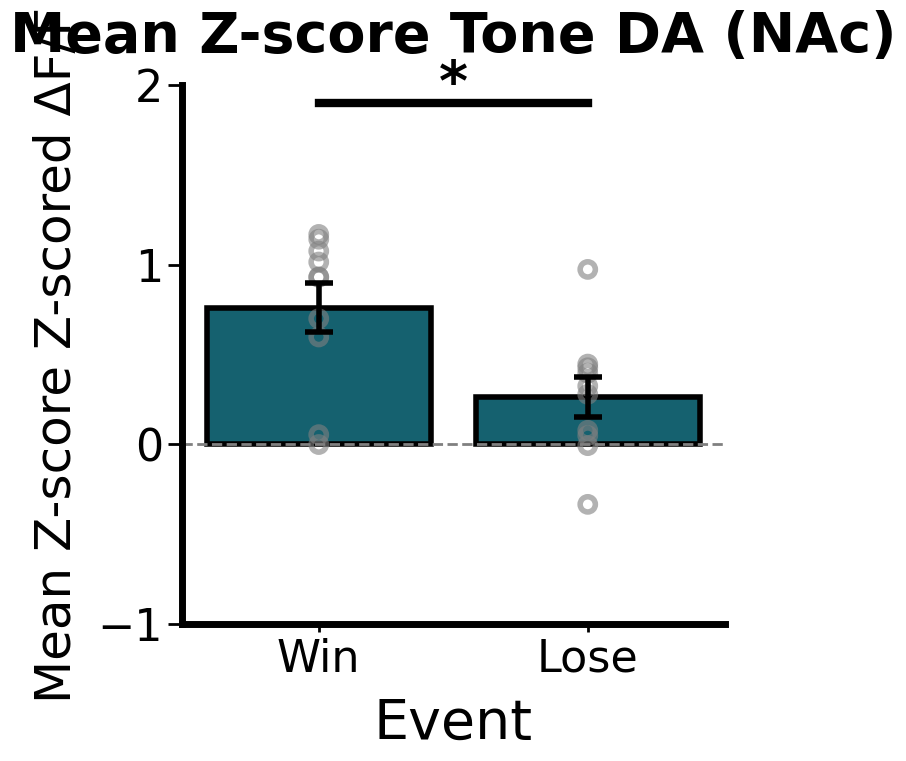

    Tone Mean Z-score EI
10              0.074632
11             -0.047548
12              0.028652
13             -0.026740
14              0.456944
15             -0.149508
16             -0.015038
17              0.164215
18              0.241701
19              0.103001
20              0.101492
21              0.051778
22              0.006757
23              0.139181
24              0.151928
    Tone Mean Z-score EI
10              0.050935
11             -0.003955
12              0.086571
13              0.088395
14             -0.009090
15             -0.068060
16              0.010310
17             -0.194241
18              0.043281
19             -0.006968
20             -0.203115
21              0.014745
22              0.150671
23              0.248147
24              0.038601
Index(['Tone Mean Z-score EI'], dtype='object')
Processing column: Tone Mean Z-score EI
df: 10    0.074632
11   -0.047548
12    0.028652
13   -0.026740
14    0.456944
15   -0.149508
16   -0.015038
17 

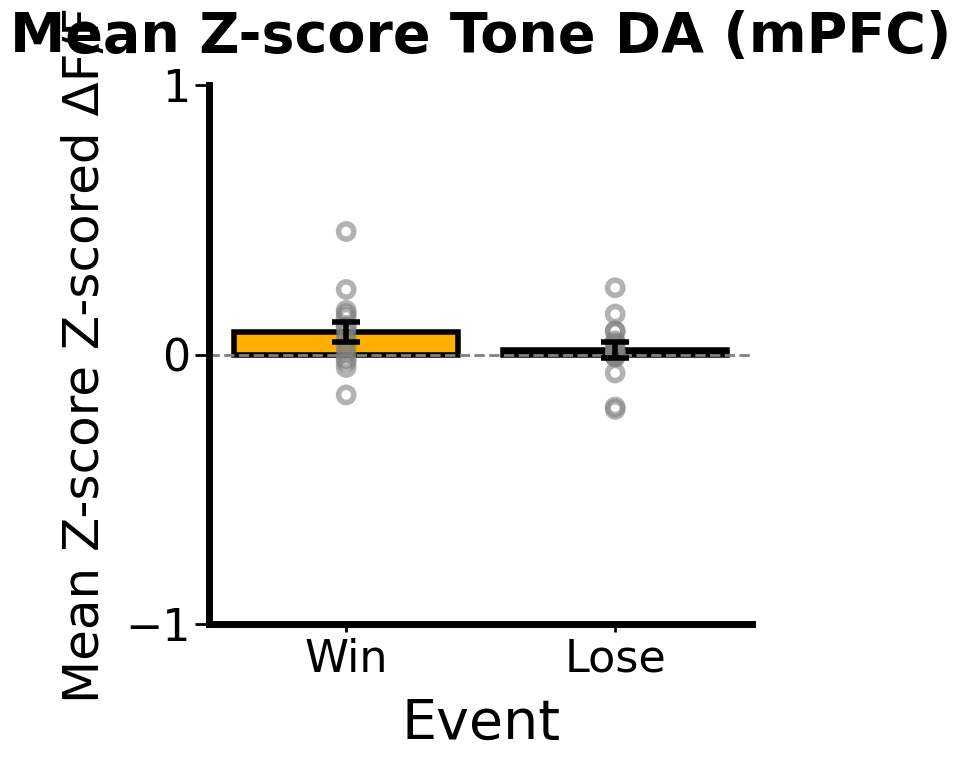

In [36]:
# Plots win and lose da_metrics in bar plots side by side. Method can be changed for global
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='AUC', directory_path=directory_path2)
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='Max Peak', directory_path=directory_path2)
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='Mean Z-score', directory_path=directory_path2)

## Plots first and last win/lass bouts for Global DA

    Tone AUC First
10        1.092786
11        0.683813
12        1.390407
13       -2.432262
14       -1.261407
15       -4.062865
16        2.785367
17        3.378778
18       -0.344887
19        1.044469
20       -0.841655
21        1.016956
22        3.175064
23       -0.952446
24        0.512226
    Tone AUC Last
10       0.076177
11       2.436269
12      -2.752903
13       2.590221
14      -3.037092
15      -1.823594
16       1.021426
17       0.147885
18       0.146643
19      -0.501907
20       0.510440
21       0.870756
22       1.406946
23      -0.794990
24       0.982865
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 10    1.092786
11    0.683813
12    1.390407
13   -2.432262
14   -1.261407
15   -4.062865
16    2.785367
17    3.378778
18   -0.344887
19    1.044469
20   -0.841655
21    1.016956
22    3.175064
23   -0.952446
24    0.512226
Name: Tone AUC First, dtype: float64
df1: 10    0.076177
11    2.436269
12   -2.752903
13    2.590221
1

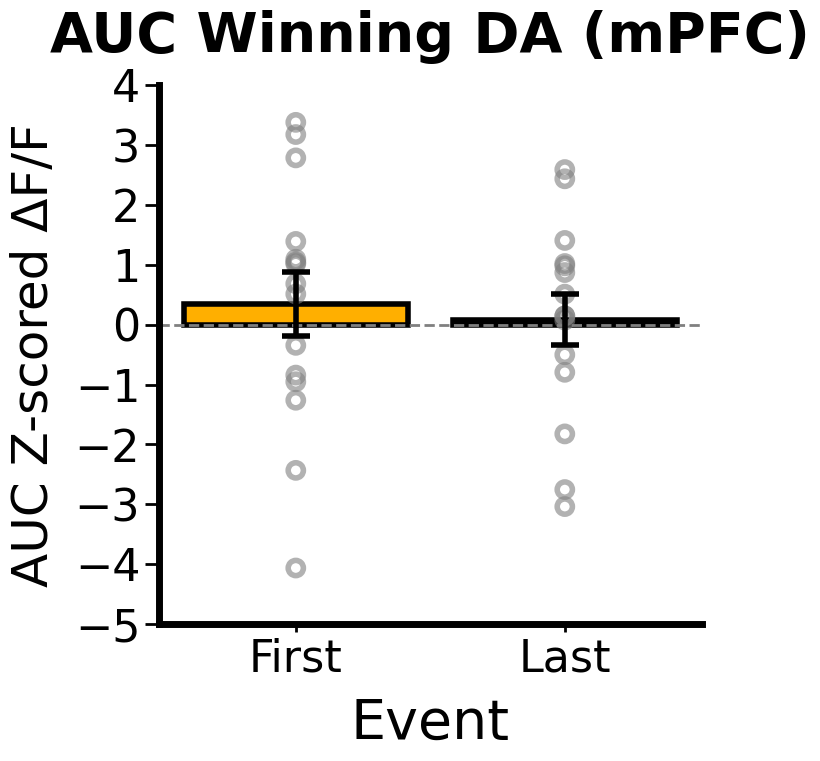

    Tone AUC First
10        2.105667
11        1.992288
12       -2.383187
13        1.898647
14        0.688156
15       -3.107753
16       -3.572182
17       -1.536319
18        0.899148
19       -0.514944
20        1.887549
21        0.044643
22        7.504692
23        0.751545
24        0.558881
    Tone AUC Last
10      -0.015759
11      -0.323638
12       2.114365
13       0.108187
14       0.177095
15       0.075818
16       1.064882
17      -0.261851
18      -2.602957
19       0.360744
20      -0.578052
21       1.437350
22       0.357181
23       0.940277
24       1.178806
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 10    2.105667
11    1.992288
12   -2.383187
13    1.898647
14    0.688156
15   -3.107753
16   -3.572182
17   -1.536319
18    0.899148
19   -0.514944
20    1.887549
21    0.044643
22    7.504692
23    0.751545
24    0.558881
Name: Tone AUC First, dtype: float64
df1: 10   -0.015759
11   -0.323638
12    2.114365
13    0.108187
1

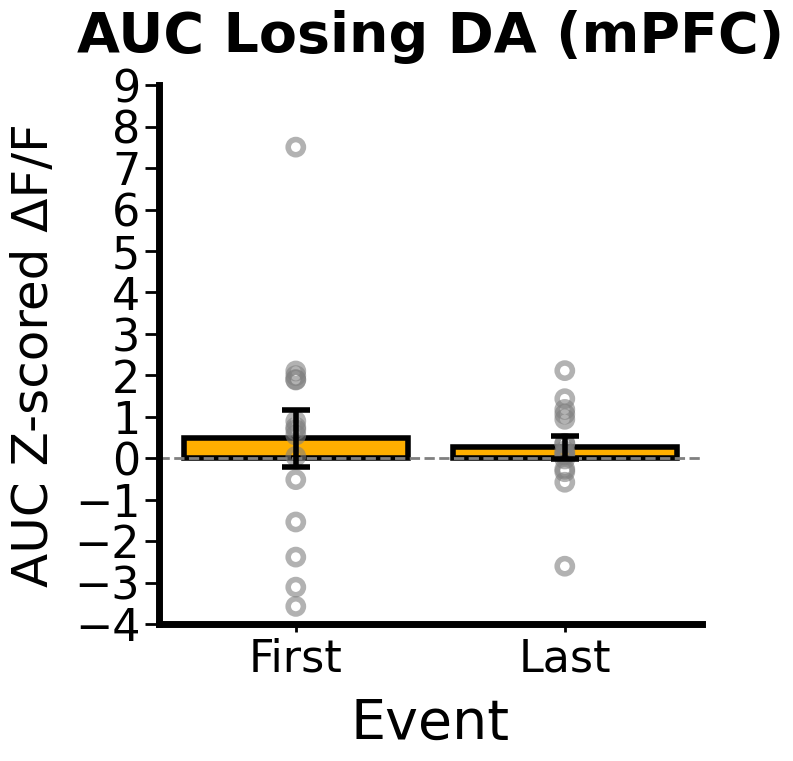

   Tone AUC First
0       -0.116363
1        1.210131
2        3.287471
3        6.739703
4        5.938531
5        2.154803
6        8.692513
7        6.575658
8        4.572526
9        7.737011
   Tone AUC Last
0       2.217498
1       0.995702
2       1.316375
3       1.035504
4       4.858727
5       2.756375
6       5.393599
7       3.144169
8       3.822120
9       1.906590
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 0   -0.116363
1    1.210131
2    3.287471
3    6.739703
4    5.938531
5    2.154803
6    8.692513
7    6.575658
8    4.572526
9    7.737011
Name: Tone AUC First, dtype: float64
df1: 0    2.217498
1    0.995702
2    1.316375
3    1.035504
4    4.858727
5    2.756375
6    5.393599
7    3.144169
8    3.822120
9    1.906590
Name: Tone AUC Last, dtype: float64
T-test for Tone AUC First and Tone AUC Last: t=1.835, p=8.840e-02


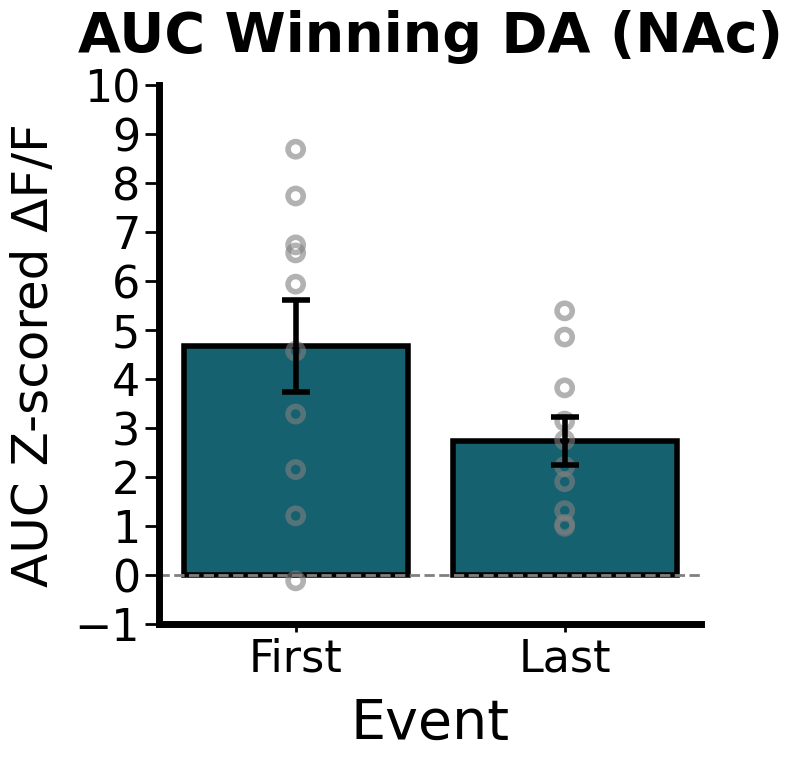

   Tone AUC First
0        0.781130
1       -0.627179
2       -0.429437
3       -1.081447
4        3.072840
5       -1.653801
6        1.936166
7       -0.402999
8        5.650282
9        1.607133
   Tone AUC Last
0      -1.817330
1      -0.094105
2       4.071527
3      -3.057095
4      -1.224395
5      -0.533504
6       2.500891
7      -0.373733
8      -1.143996
9       5.394497
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 0    0.781130
1   -0.627179
2   -0.429437
3   -1.081447
4    3.072840
5   -1.653801
6    1.936166
7   -0.402999
8    5.650282
9    1.607133
Name: Tone AUC First, dtype: float64
df1: 0   -1.817330
1   -0.094105
2    4.071527
3   -3.057095
4   -1.224395
5   -0.533504
6    2.500891
7   -0.373733
8   -1.143996
9    5.394497
Name: Tone AUC Last, dtype: float64
T-test for Tone AUC First and Tone AUC Last: t=0.461, p=6.507e-01


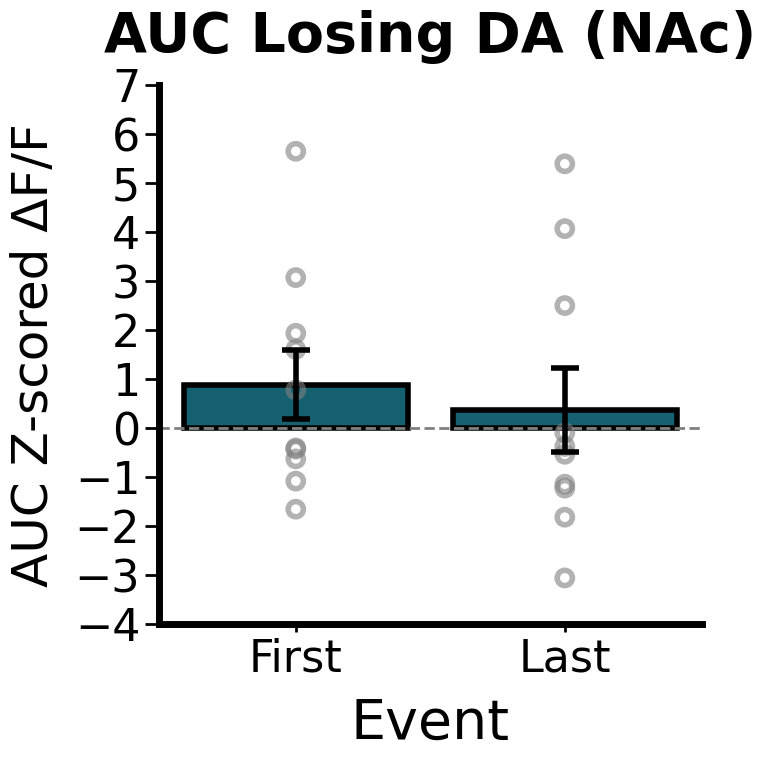

In [37]:
# Plots bar plots of the first and last wins or loses side by side.
exp.plot_da_first_last(df_win1, metric_name='AUC', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win1, metric_name='AUC', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")

In [38]:
# Same as previous but using Max Peak as metric
"""exp.plot_da_first_last(df_win, metric_name='Max Peak', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Max Peak', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="NAc")'

In [39]:
# Same as previous but using Mean Z-score as metric
"""exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="NAc")'

## Plot first and last win/loss bouts for Event Induced DA

In [40]:
# Same as previous but using EI da metrics.
"""exp.plot_da_first_last(df_win, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="NAc")'

In [41]:
"""exp.plot_da_first_last(df_win, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="NAc")'

In [42]:
"""exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="NAc")'

## Scatter plots for Event Induced

0
   Rank
5     1
9     1
0     2
3     2
7     2


FileNotFoundError: [Errno 2] No such file or directory: 'None\\Tone AUC Winning DA response Rank (NAc).png'

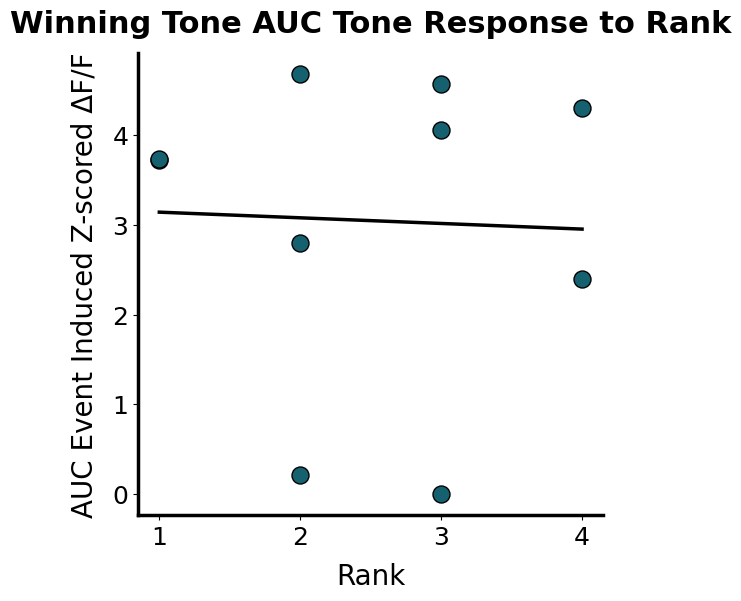

In [43]:
# Plots a scatter plot based on DA metric to tone and rank within cage. metric_name can be changed for other metrics
exp.scatter_dominance(directory_path1, df_win1, metric_name='Tone AUC', method='EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_lose1, metric_name='Tone AUC', method='EI', condition="Losing")

## First Tone DA

In [ ]:
# Plots the DA metrics from the first tone as bar plots side by side
"""exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='AUC Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='Max Peak Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='Mean Z-score Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='AUC Mean', directory_path=directory_path9)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='Max Peak Mean', directory_path=directory_path9)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='Mean Z-score Mean', directory_path=directory_path9)"""

In [ ]:
# Plots scatter plots for dominance using only the DA-response from the first tone.
"""exp.scatter_dominance(directory_path1, df_first_win1, metric_name='AUC', method=' EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_first_lose1, metric_name='AUC', method=' EI', condition="Losing")
exp.scatter_dominance(directory_path1, df_first_win1, metric_name='Max Peak', method=' EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_first_lose1, metric_name='Max Peak', method=' EI', condition="Losing")
exp.scatter_dominance(directory_path1, df_first_win1, 'Mean Z-score', method=' EI', condition='Winning')
exp.scatter_dominance(directory_path1, df_first_lose1, 'Mean Z-score', method=' EI', condition='Losing')"""